AERIAL SATISFY

Il progetto "Aerial Satisfy" si focalizza sull'analisi della soddisfazione dei passeggeri aerei di una compagnia, utilizzando un ampio set di dati che include informazioni generiche dei passeggeri, dettagli del viaggio e feedback sulla loro esperienza di volo;
il progetto mira a identificare i fattori chiave che influenzano la soddisfazione del cliente. 

1. Acquisizione dei Dati: Analisi dei dataset di training e test per comprendere la struttura e il contenuto dei dati.

2. Analisi Esplorativa (EDA): Esame approfondito dei dati attraverso tecniche di visualizzazione per scoprire correlazioni, distribuzioni egestione di outlier

3. Feature Engineering: Pulizia e trasformazione dei dati, gestione dei valori mancanti, selezione e creazione di nuove caratteristiche rilevanti.

4. Modellazione (Experiments): Addestramento e confronto di vari modelli di machine learning, inclusi Random Forest e XGBoost, per prevedere la soddisfazione dei passeggeri.

5. Conclusioni: Analisi dei risultati dei modelli per identificare i principali fattori di soddisfazione e formulare raccomandazioni basate sui dati.

L'obiettivo del progetto è fornire intuizioni approfondite sulla soddisfazione dei passeggeri, contribuendo a migliorare l'esperienza di viaggio nel settore aereo.

1. Acquisizione dei Dati



In [1]:
# Importare le librerie necessarie
import pandas as pd
import pandas as pd
import seaborn as sns                        
import matplotlib.pyplot as plt              
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


# Percorsi dei file CSV
file_train_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\data set progetto finale\train.csv'  
file_test_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\data set progetto finale\test.csv'  

# Caricamento dei dataset
train_data = pd.read_csv(file_train_path)
test_data = pd.read_csv(file_test_path)

1.1 Data cleaning

In [2]:
# Verifico che non ci siano valori infiniti
train_data.replace([np.inf, -np.inf], np.nan, inplace=True)            # cerco nel DataFrame tutti i valori che sono infiniti (sia positivi np.inf che negativi -np.inf) e li sostituisco con valori NaN

# Pulizia dei dati: sostituzione dei NaN con la media o zero (dipende dal contesto)
for column in train_data.columns:
    if train_data[column].dtype in [np.float64, np.int64]:
        train_data[column].fillna(0, inplace=True)




- Train

In [3]:
# Visualizzazione delle prime righe dei dataset per un'anteprima
print("Anteprima Dataset di Training:")
print(train_data.head())

# Verifica delle informazioni sui dati
print("\nInformazioni Dataset di Training:")
print(train_data.info())

# Statistiche descrittive del dataset di training
print("\nStatistiche Descrittive del Dataset di Training:")
print(train_data.describe())

# Verifica dei valori mancanti nel dataset di training
print("\nValori Mancanti nel Dataset di Training:")
print(train_data.isnull().sum())

Anteprima Dataset di Training:
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel   
0           0   70172    Male     Loyal Customer   13  Personal Travel  \
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service   
0  Eco Plus              460                      3  \
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment   
0                                  4  ...                       5  \
1                                  2  ...              

- test

In [4]:
print("Anteprima Dataset di Training:")                      # Visualizzazione delle prime righe dei dataset per un'anteprima
print(test_data.head())


print("\nInformazioni Dataset di Training:")                 # Verifica delle informazioni sui dati
print(test_data.info())


print("\nStatistiche Descrittive del Dataset di Training:")  # Statistiche descrittive del dataset di test
print(test_data.describe())


print("\nValori Mancanti nel Dataset di Training:")          # Verifica dei valori mancanti nel dataset di test
print(test_data.isnull().sum())


Anteprima Dataset di Training:
   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel   
0           0  19556  Female     Loyal Customer   52  Business travel  \
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service   
0       Eco              160                      5  \
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment   
0                                  4  ...                       5  \
1                                  1  ...                    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

2. ANALISI ESPLORATIVA DEI DATI (EDA)

2.1 Variabili Numeriche

- Dataset di train

In [5]:
# Caricamento dei dati
file_train_path = r'C:\Users\alessandro\Desktop\desktop\master\Notebooks\data set progetto finale\train.csv'
data = pd.read_csv(file_train_path)

# Esplorazione delle variabili numeriche
numeric_vars = train_data.select_dtypes(include=['int64', 'float64']).columns

for var in numeric_vars:
    print(f"Distribuzione della variabile {var}:")
    print(train_data[var].describe())
    print("\n")


Distribuzione della variabile Unnamed: 0:
count    103904.000000
mean      51951.500000
std       29994.645522
min           0.000000
25%       25975.750000
50%       51951.500000
75%       77927.250000
max      103903.000000
Name: Unnamed: 0, dtype: float64


Distribuzione della variabile id:
count    103904.000000
mean      64924.210502
std       37463.812252
min           1.000000
25%       32533.750000
50%       64856.500000
75%       97368.250000
max      129880.000000
Name: id, dtype: float64


Distribuzione della variabile Age:
count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64


Distribuzione della variabile Flight Distance:
count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Dis

Comincio a visualizzare le variabili con una mappa di correlazione così da avere una prima idea sul Dataset

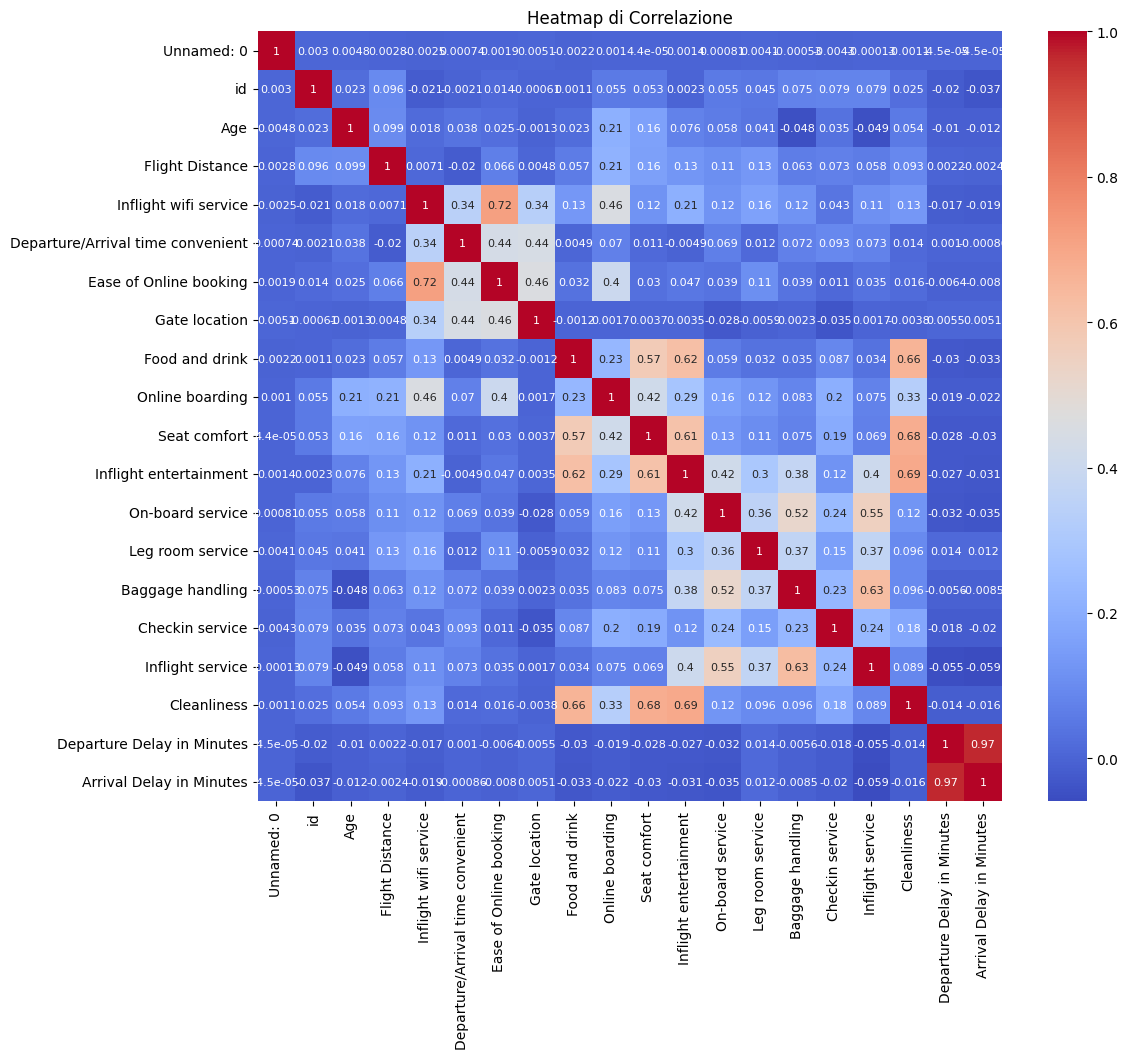

In [6]:
# Seleziona solo le colonne numeriche per la correlazione
numeric_data = data.select_dtypes(include=[np.number])

# Correlazioni
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', annot_kws={'size': 8})  # Riduci la dimensione del font
plt.title('Heatmap di Correlazione')
plt.show()

La heatmap di correlazione del nostro dataset ha rivelato diverse relazioni interessanti tra le variabili numeriche, questa analisi ci fornisce una base solida per la selezione delle caratteristiche e l'orientamento delle nostre future analisi di modellazione..
le variabili più correlate sono :

- Inflight wifi service e Ease of Online booking: Con una correlazione di 0.72, questo suggerisce che i passeggeri che trovano facile prenotare online tendono anche a essere più soddisfatti del servizio wifi durante il volo.

- Inflight entertainment e Seat comfort: Queste due variabili hanno una correlazione di 0.69, indicando che i passeggeri che sono soddisfatti dell'intrattenimento a bordo tendono anche a trovare confortevoli i sedili.

- Food and drink e Cleanliness: Una correlazione di 0.66 mostra che le impressioni dei passeggeri sulla pulizia sono fortemente associate alle loro opinioni sul cibo e le bevande.

- Baggage handling e Checkin service: Con una correlazione di 0.63, questo suggerisce che i passeggeri che sono soddisfatti del servizio di check-in tendono anche a essere soddisfatti del trattamento dei bagagli.

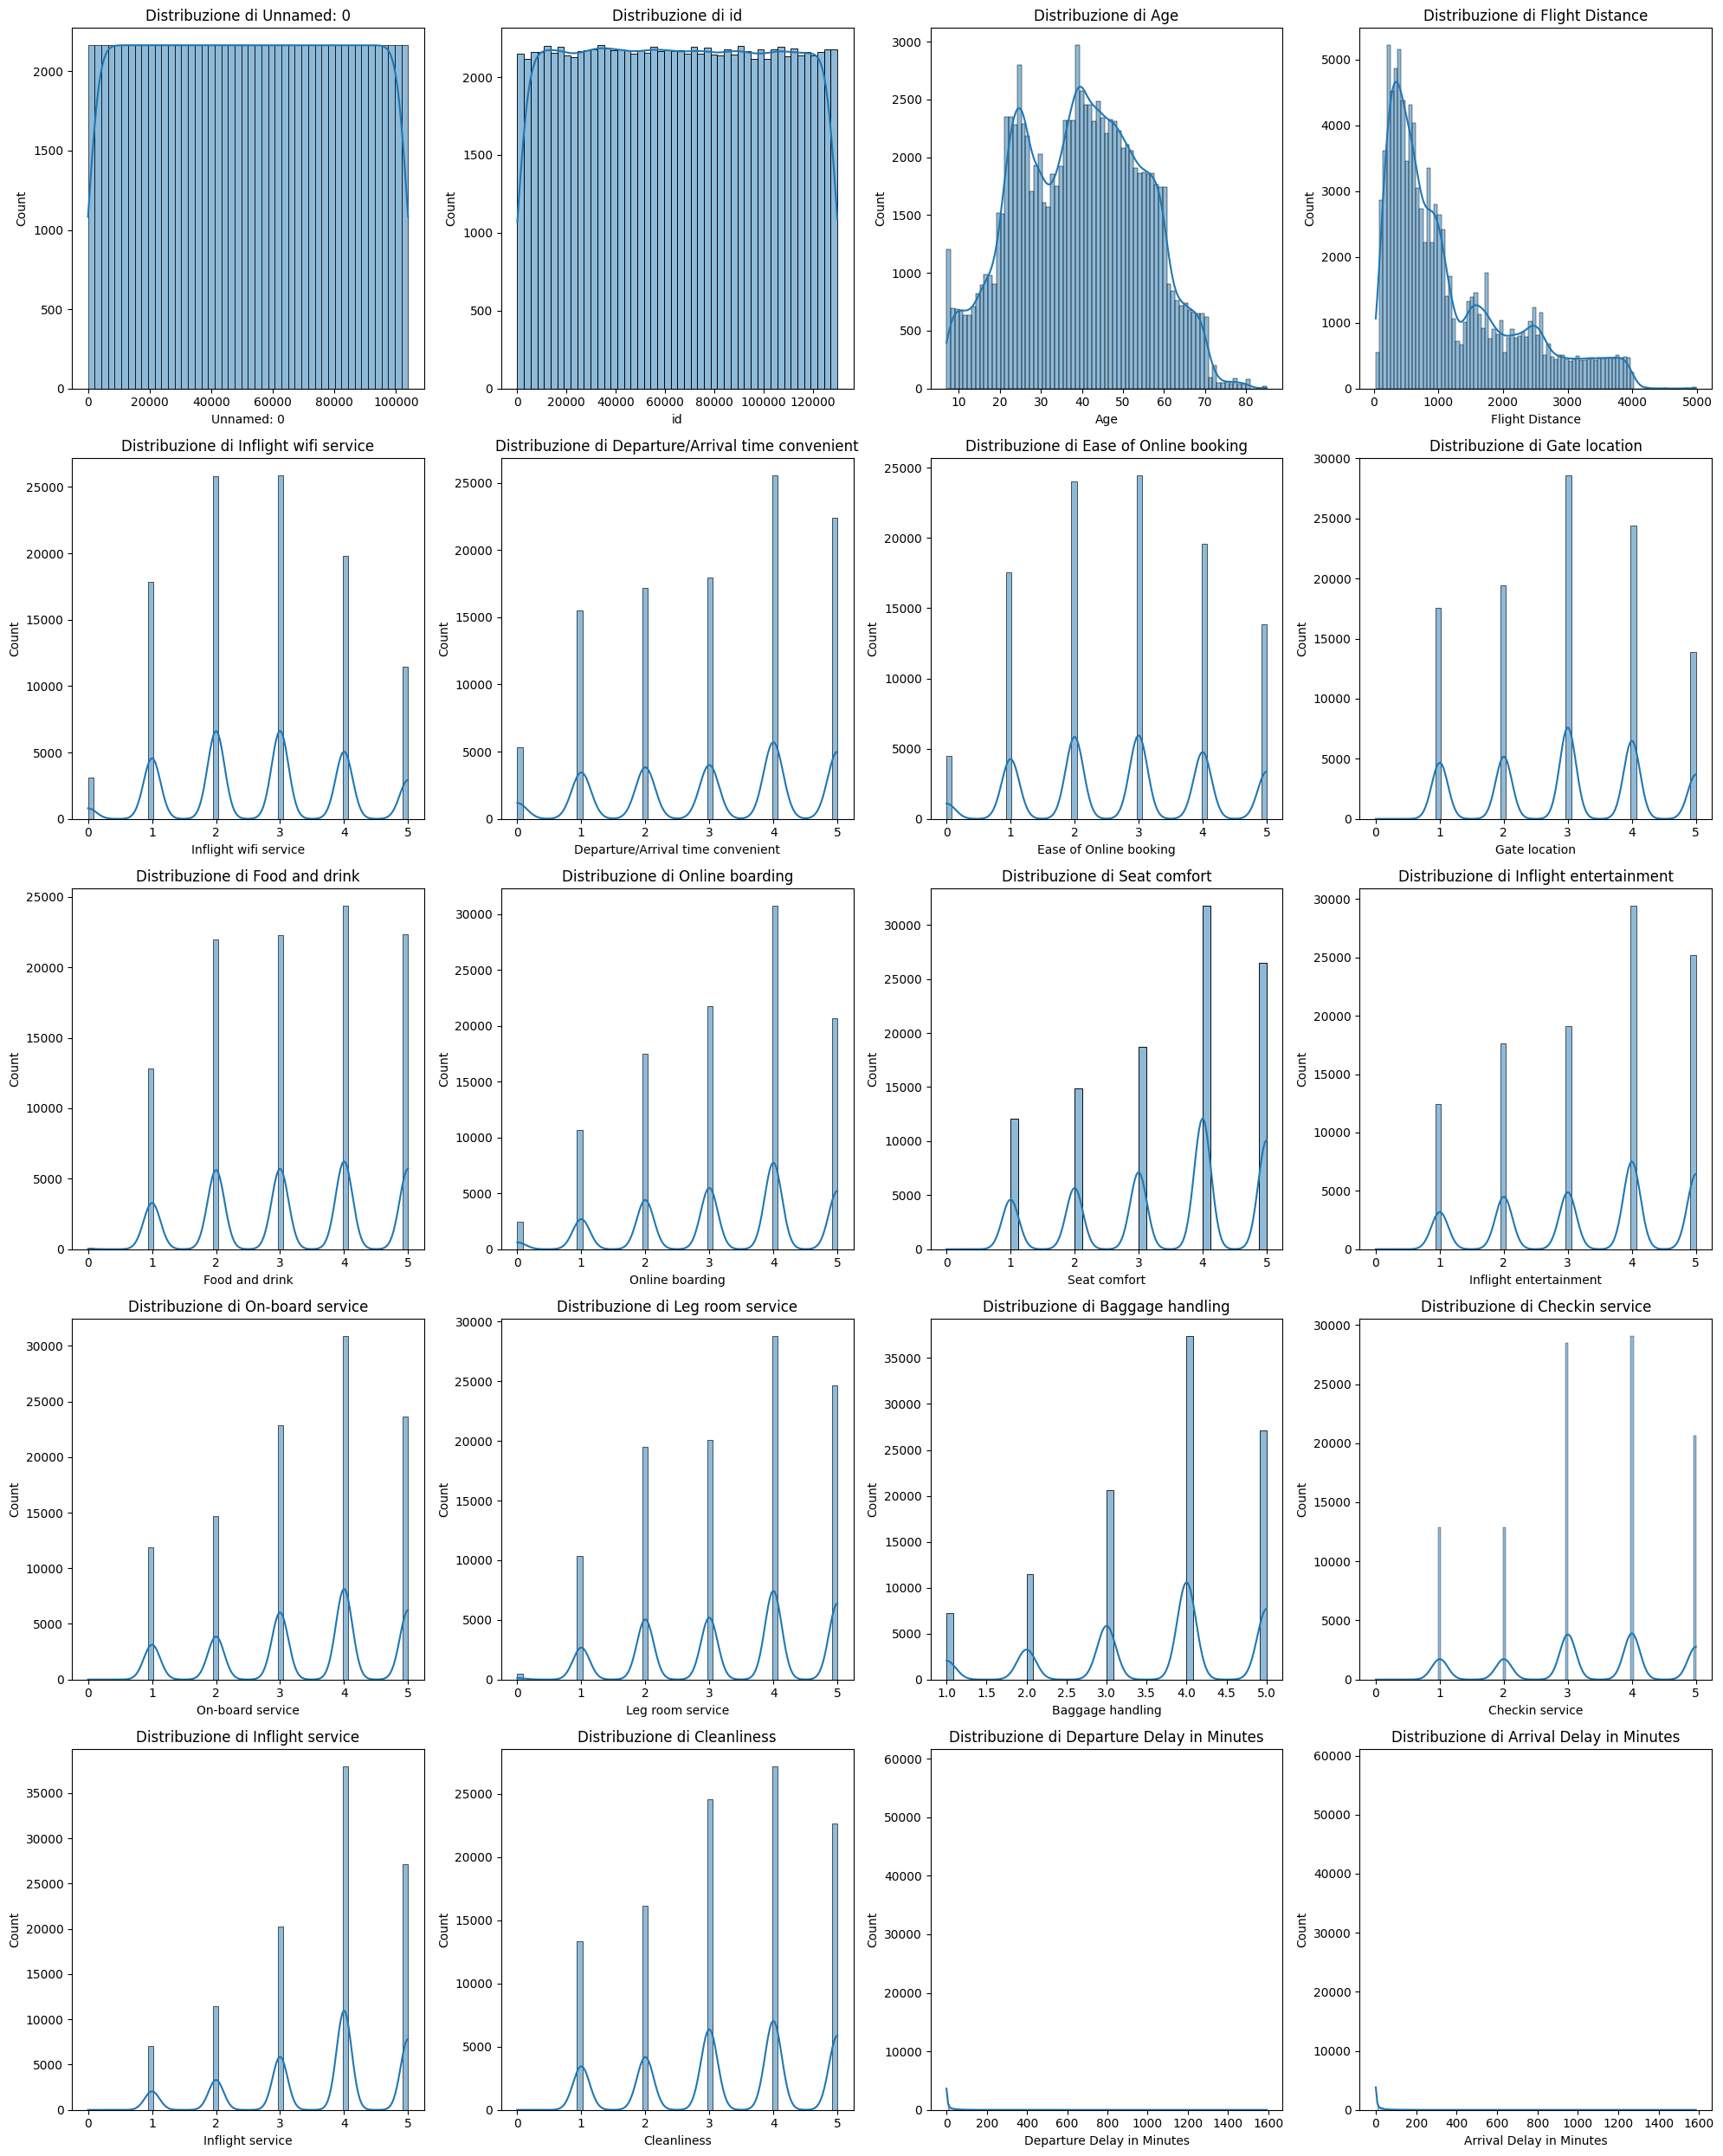

In [7]:
# Comincio a visualizzare le variabili numeriche del dataset di train
# attraverso degli istogrammi. 
train_data = pd.read_csv(file_train_path)

numeric_vars = train_data.select_dtypes(include=['int64', 'float64']).columns   # Seleziono le variabili numeriche


plt.figure(figsize=(20, 25))                                              # Configurazione degli istogrammi in una griglia 4x5
for i, var in enumerate(numeric_vars):
    plt.subplot(5, 4, i + 1)
    sns.histplot(train_data[var], kde=True)
    plt.title(f'Distribuzione di {var}')
    plt.tight_layout()

plt.show()


Da come si puo osservare ci sono una varietà di distribuzioni nelle variabili numeriche. In particolare due variabili da analizzare in modo più approfondito poichè potrebbero presentare potenziali outlier o hanno distribuzioni particolari dato che presentano lunghe code negli istogrammi: "Departure Delay in Minutes" e "Arrival Delay in Minutes"

Controllo di potenziali outlier 

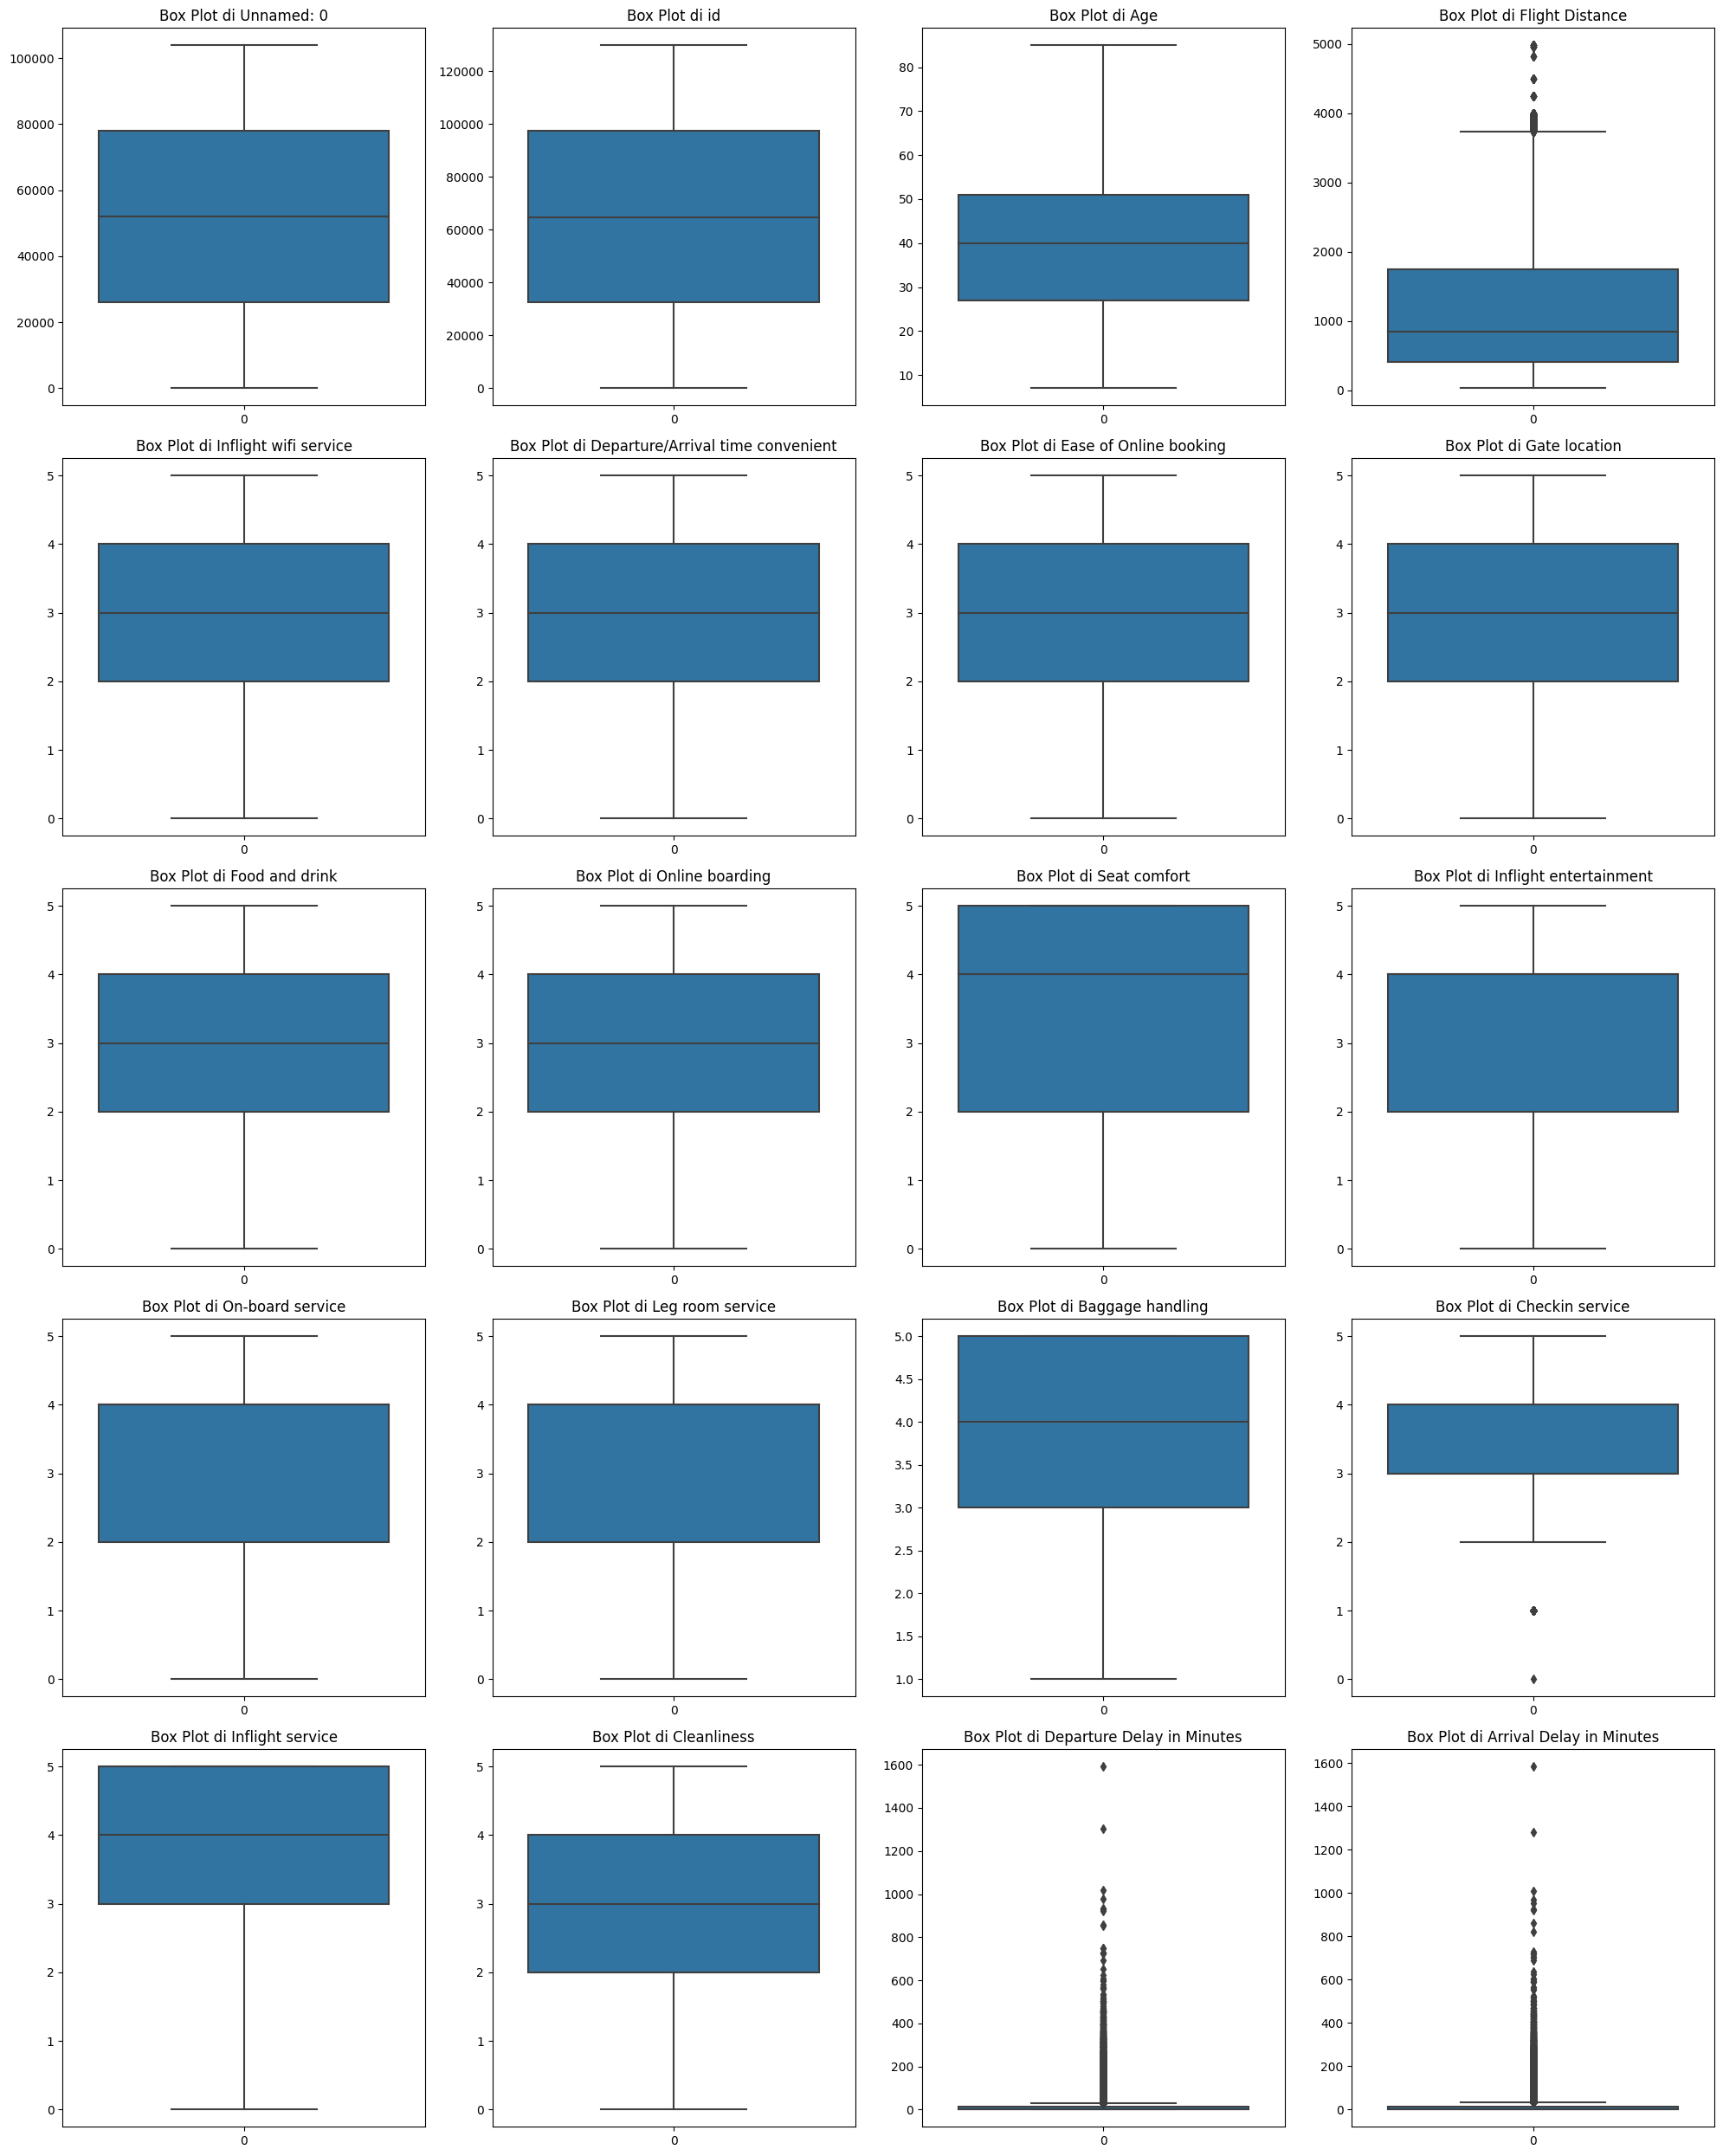

In [8]:

numeric_vars = train_data.select_dtypes(include=['int64', 'float64']).columns       # Seleziono le variabili numeriche

plt.figure(figsize=(20, 25))                                                  # Configurazione dei box plots per identificare outlier in una griglia 4x5
for i, var in enumerate(numeric_vars):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(train_data[var])
    plt.title(f'Box Plot di {var}')
    plt.tight_layout()

plt.show()


Dall'analisi dei box plots, abbiamo identificato diverse variabili nel nostro dataset che presentano outlier significativi, le due citate precedentemente sono le piu influenti. Questi outlier potrebbero essere indicativi di situazioni speciali o errori nei dati. La loro presenza richiede attenzione, in quanto possono influenzare le analisi successive e le prestazioni dei modelli predittivi.


In [9]:
# risolvo il problema degli outlier usando il metodo di capping questo calcola i limiti inferiori e superiori per ciascuna delle variabili specificate nel dataset
# e poi li utilizza per limitare gli outlier nelle stesse variabili. 


outlier_vars = ['Departure Delay in Minutes', 'Arrival Delay in Minutes']                 # Identifico le variabili per le quali intendo gestire gli outlier

limits = {var: train_data[var].quantile([0.05, 0.95]).values for var in outlier_vars}     # Calcolo i limiti per il capping 

for var in outlier_vars:                                                                  # Applico il capping agli outlier
    lower_limit, upper_limit = limits[var]
    train_data[var] = np.clip(train_data[var], lower_limit, upper_limit)


In [10]:
#controllo se il capping è stato effettuato

for var in outlier_vars:
    print(f"{var} - Min: {train_data[var].min()}, Max: {train_data[var].max()}")


Departure Delay in Minutes - Min: 0, Max: 78
Arrival Delay in Minutes - Min: 0.0, Max: 79.0


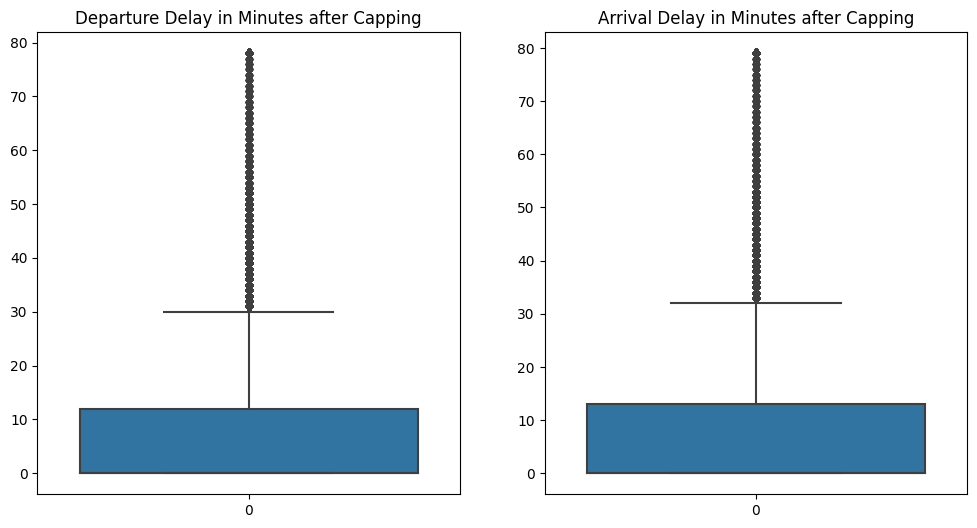

In [11]:
plt.figure(figsize=(12, 6))                         #vedo i nuovi grafici ottimizzati
plt.subplot(1, 2, 1)
sns.boxplot(train_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes after Capping')

plt.subplot(1, 2, 2)
sns.boxplot(train_data['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes after Capping')

plt.show()


- Dataset di test

controllo se ci sono degli outlier anche nel dataset di  test

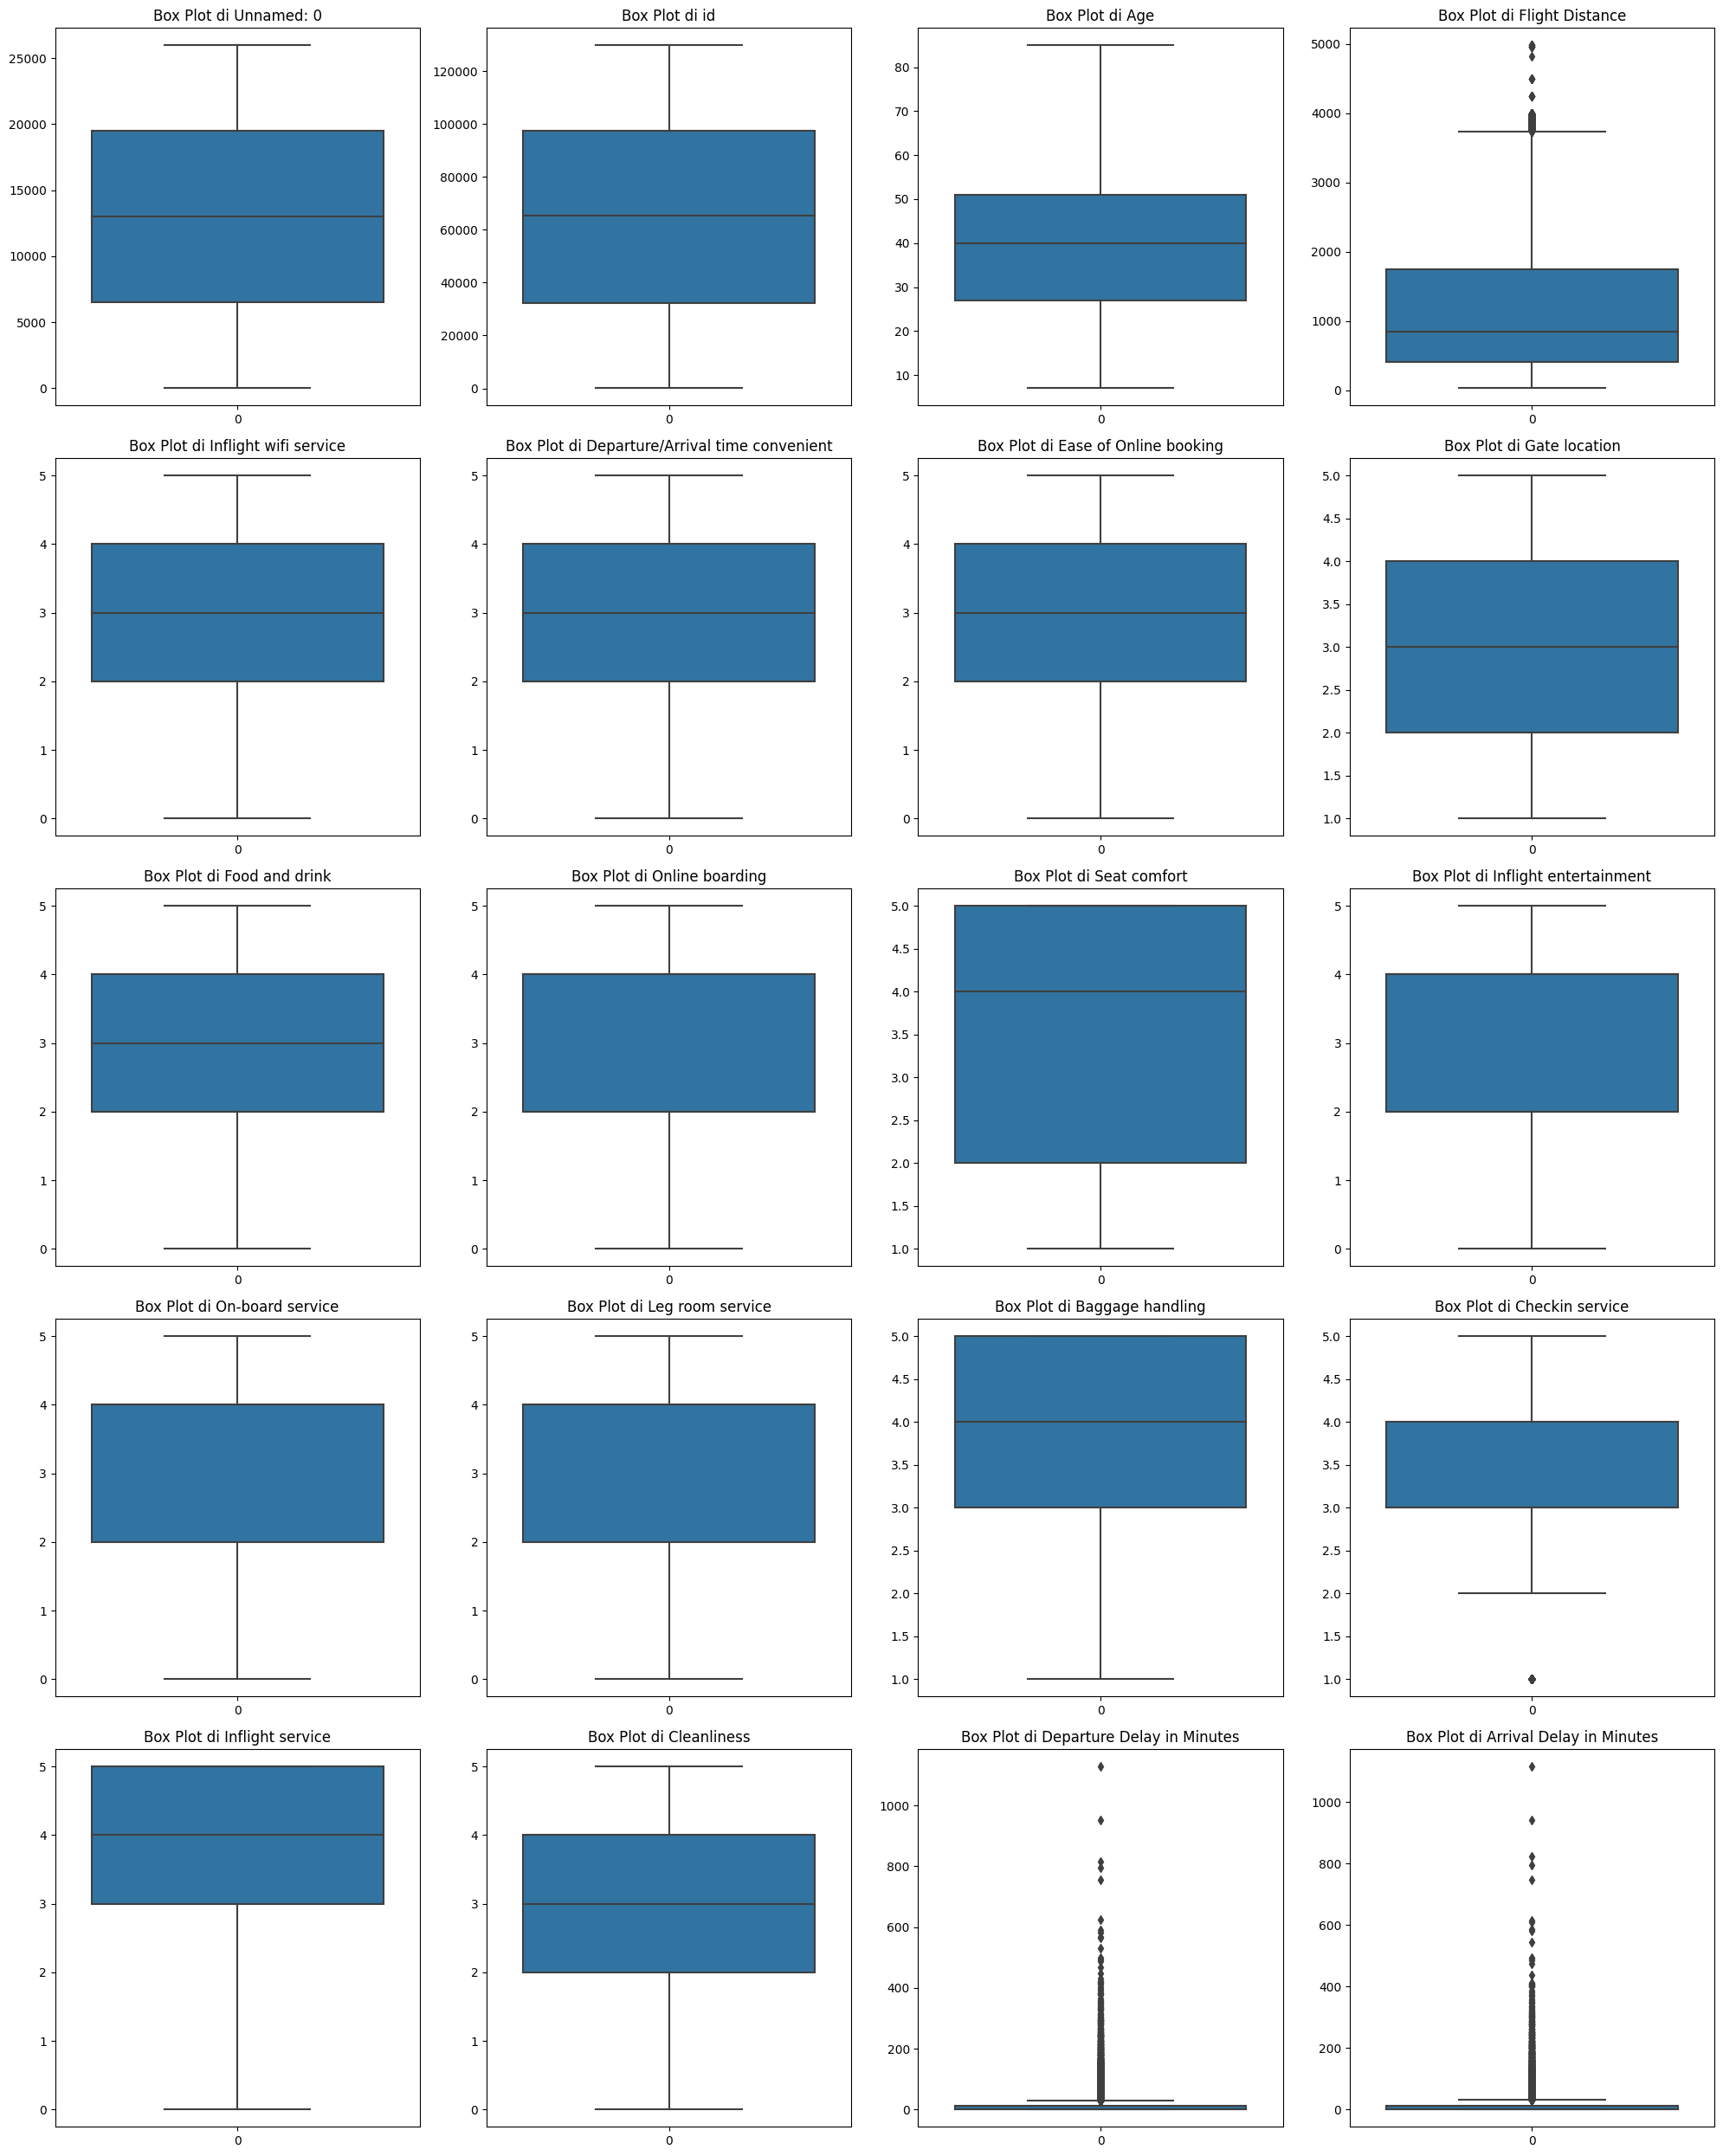

In [12]:

numeric_vars_test = test_data.select_dtypes(include=['int64', 'float64']).columns        # Seleziona le variabili numeriche nel dataset di test


plt.figure(figsize=(20, 25))                                                             # Configurazione dei box plots per identificare outlier in una griglia 5x4
for i, var in enumerate(numeric_vars_test):
    plt.subplot(5, 4, i + 1)  
    sns.boxplot(test_data[var])
    plt.title(f'Box Plot di {var}')
    plt.tight_layout()

plt.show()



procedo con lo stesso metodo di clapping del train in modo da non creare problemi in fase di modellazione

In [13]:
# Applico il capping agli outlier nel dataset di test


for var in outlier_vars:                                                         # Uso i limiti calcolati dal dataset di training
    lower_limit, upper_limit = limits[var]
    test_data[var] = np.clip(test_data[var], lower_limit, upper_limit)


for var in outlier_vars:                                                        # Controllo se il capping è stato effettuato correttamente
    print(f"{var} - Min: {test_data[var].min()}, Max: {test_data[var].max()}")



Departure Delay in Minutes - Min: 0, Max: 78
Arrival Delay in Minutes - Min: 0.0, Max: 79.0


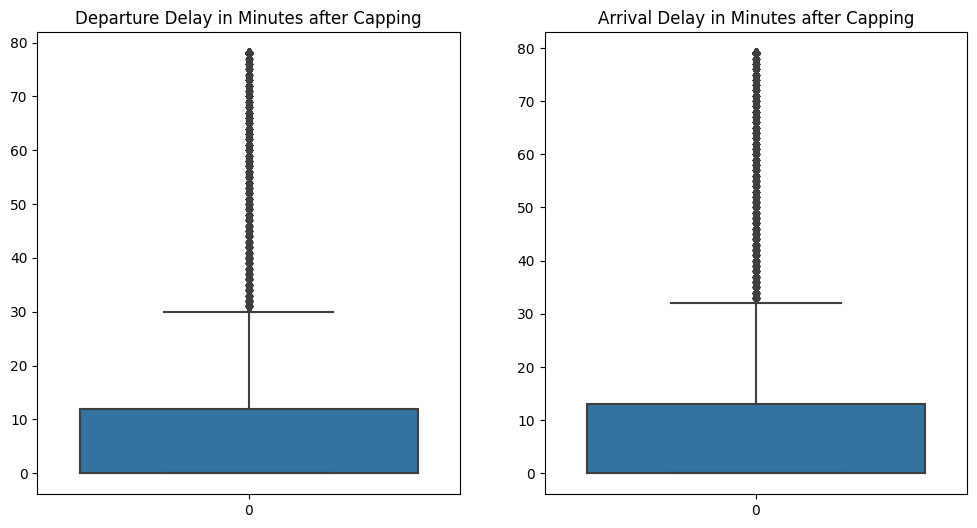

In [14]:
# Controllo se il grafico delle variabili è stato ottimizzato

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(test_data['Departure Delay in Minutes'])
plt.title('Departure Delay in Minutes after Capping')

plt.subplot(1, 2, 2)
sns.boxplot(test_data['Arrival Delay in Minutes'])
plt.title('Arrival Delay in Minutes after Capping')

plt.show()

Ora che gli outlier delle variabili numeriche sono stati sistemati passiamo all'analisi delle variabili categoriche

2.2 VARIABILI CATEGORICHE

- DataSet di Train

In [15]:
# Esplorazione delle variabili categoriche

categorical_vars = train_data.select_dtypes(include=['object']).columns
for var in categorical_vars:
    print(f"Distribuzione della variabile {var}:")
    print(train_data[var].value_counts())
    print("\n")

Distribuzione della variabile Gender:
Gender
Female    52727
Male      51177
Name: count, dtype: int64


Distribuzione della variabile Customer Type:
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


Distribuzione della variabile Type of Travel:
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


Distribuzione della variabile Class:
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


Distribuzione della variabile satisfaction:
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64




Al fine di esplorare la distribuzione delle categorie e ottenere una visione chiara della composizione dei dati categorici, crerò una serie di grafici per visualizzare e analizzare questi dati

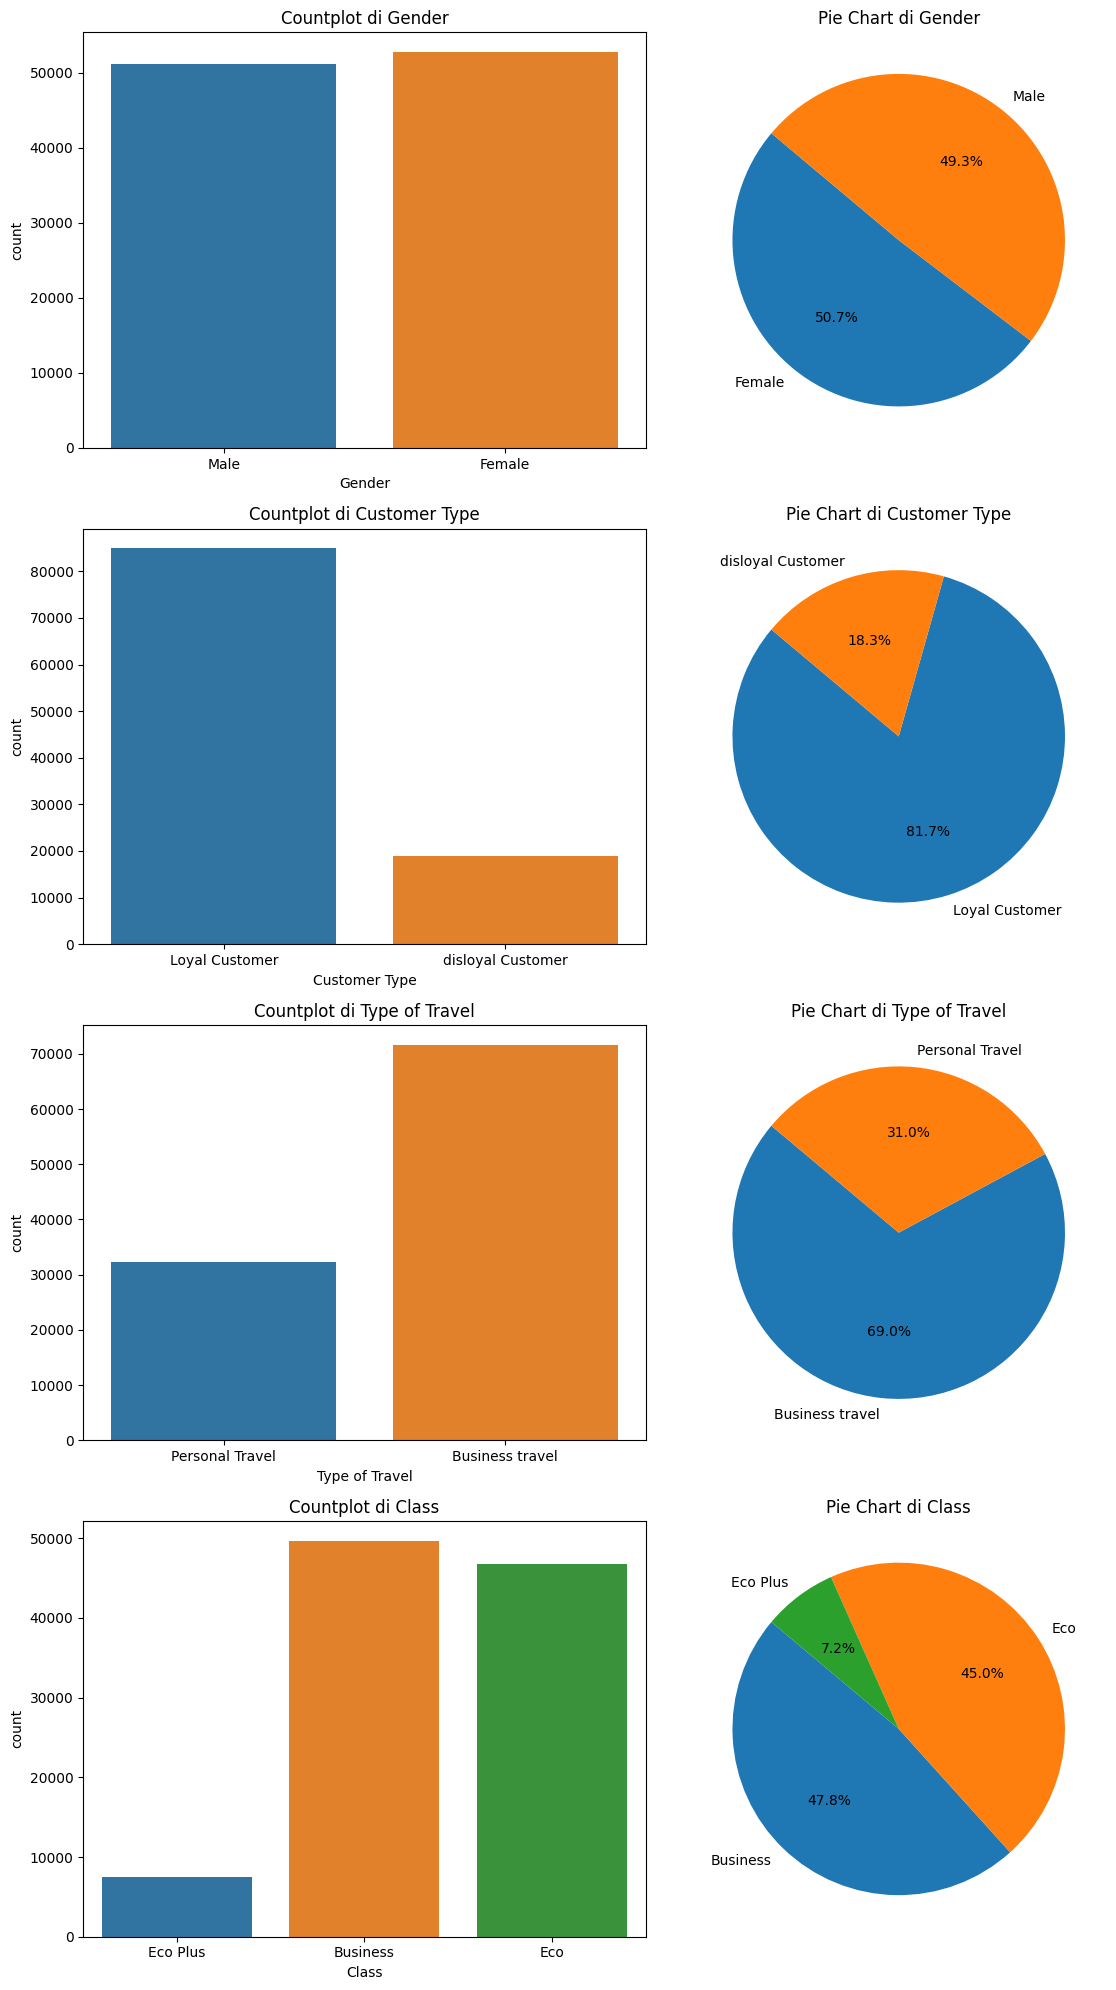

In [16]:
categorical_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']              # Variabili categoriche da analizzare


plt.figure(figsize=(12, 20))                                                           # Creazione di countplots e pie charts per ogni variabile categorica
for i, var in enumerate(categorical_vars):
  
    plt.subplot(4, 2, 2 * i + 1)
    sns.countplot(x=var, data=data)
    plt.title(f'Countplot di {var}')                                                    # Countplot nella prima colonna

   
    plt.subplot(4, 2, 2 * i + 2)
    data[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart di {var}')                                                     # Pie chart nella seconda colonna
    plt.ylabel('')

plt.tight_layout()
plt.show()



C'è una distribuzione relativamente equilibrata tra generi, una predominanza di clienti fedeli e viaggi d'affari, e una distribuzione variabile tra le classi di volo.

- Dataset di test

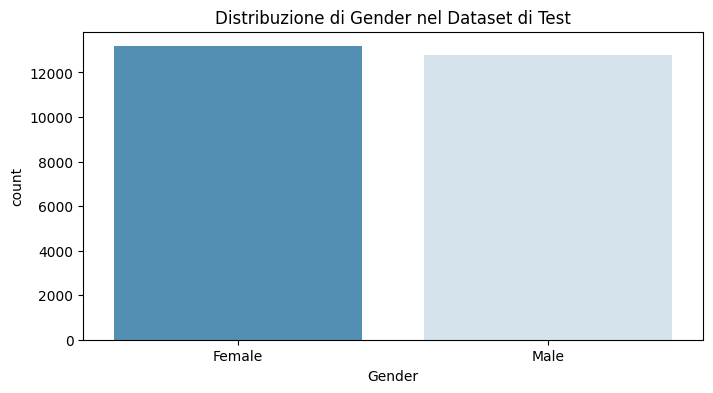

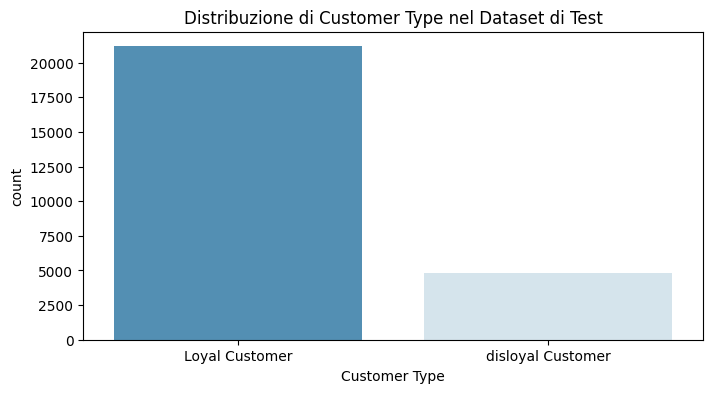

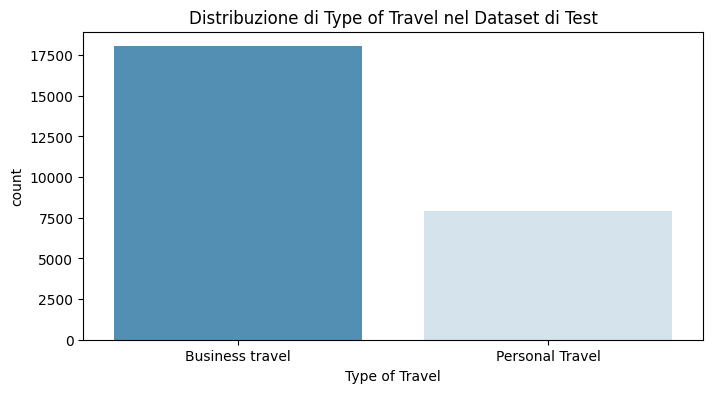

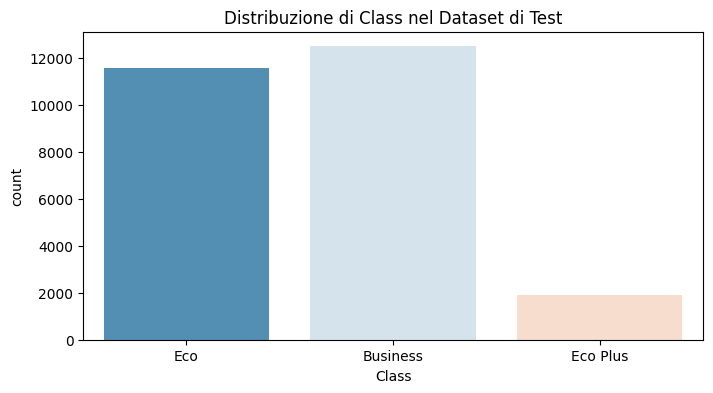

In [17]:
#  Definisco una serie di colori inversa per avere una distinzione visiva tra i dati nei dataset 

palette_inversa = sns.color_palette("RdBu_r", len(categorical_vars))                    
                                                                                         
for var in categorical_vars:                                                # itera attraverso ogni variabile categorica nella lista categorical_vars e ne crea un grafico
    plt.figure(figsize=(8, 4))
    
    
    sns.countplot(x=var, data=test_data, palette=palette_inversa)           # Utilizzo la palette inversa
    plt.title(f'Distribuzione di {var} nel Dataset di Test')
    plt.show()


I dati rispecchiamano in modo adeguato le caratteristiche del data set di Train

2.3 OSSERVAZIONE

Una variabile che ci può tornare molto utile nella nostra analisi è quella della fedeltà del cliente, se riusciamo a capire quale sono le caratteristiche principali che portano i clienti ad essere fedeli 'Loyalty'  alla compagnia possiamo fare delle previsioni sulla soddisfazione molto piu accurate

In [18]:
# Conto il numero di clienti leali e non leali e li stampo a schermo

customer_counts = data['Customer Type'].value_counts()
loyal_customers_count = customer_counts.get('Loyal Customer', 0)
disloyal_customers_count = customer_counts.get('disloyal Customer', 0)

print(f"Numero di clienti leali: {loyal_customers_count}")
print(f"Numero di clienti non leali: {disloyal_customers_count}")


Numero di clienti leali: 84923
Numero di clienti non leali: 18981


In [19]:
# Calcolo il conteggio dei tipi di viaggio per ogni tipo di cliente
travel_type_counts = data.groupby(['Customer Type', 'Type of Travel']).size().unstack()
print(travel_type_counts)


Type of Travel     Business travel  Personal Travel
Customer Type                                      
Loyal Customer               52838            32085
disloyal Customer            18817              164


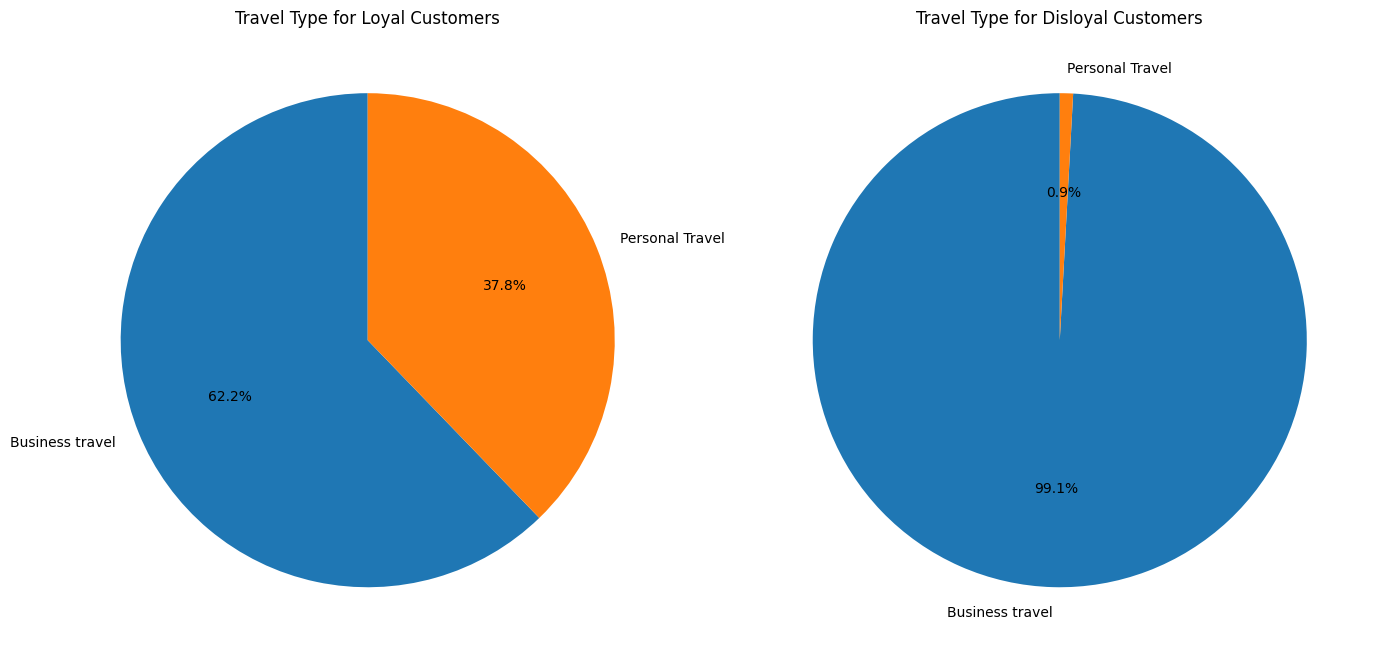

In [20]:
# Calcolo il conteggio dei tipi di viaggio per ogni tipo di cliente
travel_type_counts = data.groupby(['Customer Type', 'Type of Travel']).size().unstack()

# Creo un grafico a torta per i clienti leali
plt.figure(figsize=(14, 7))

# Grafico per i clienti leali
plt.subplot(1, 2, 1)
travel_type_counts.loc['Loyal Customer'].plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Travel Type for Loyal Customers')
plt.ylabel('')  

# Grafico per i clienti non leali
plt.subplot(1, 2, 2)
travel_type_counts.loc['disloyal Customer'].plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Travel Type for Disloyal Customers')
plt.ylabel('')  
plt.tight_layout()
plt.show()


Possimao notare come i viaggi d'affari sono in percentuale molto maggiori in tutte e due le categorie di clienti

Class              Business    Eco  Eco Plus
Customer Type                               
Loyal Customer        42309  35835      6779
disloyal Customer      7356  10910       715


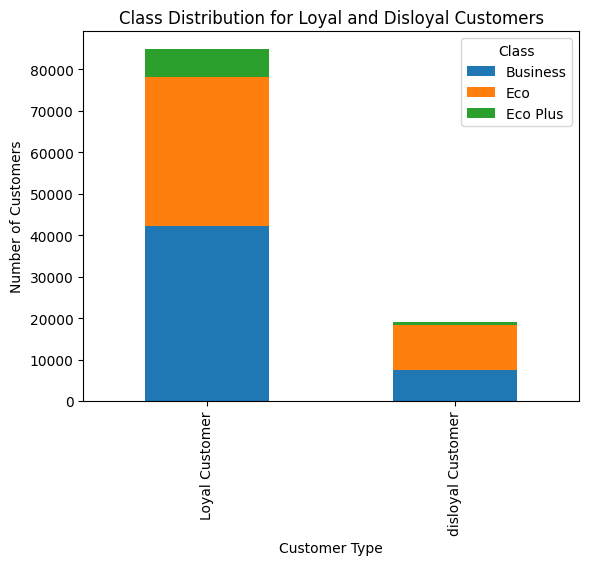

In [21]:
# Conto il numero di clienti leali e non leali per ogni classe di viaggio
class_counts = data.groupby(['Customer Type', 'Class']).size().unstack()

# Mostro i risultati
print(class_counts)

# Creo grafici a barre per visualizzare i dati
class_counts.plot(kind='bar', stacked=True)
plt.title('Class Distribution for Loyal and Disloyal Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.show()


Il grafico suggerisce che sia tra i clienti leali sia tra quelli non leali, la maggior parte viaggia in classe economica. Questo ci fa intuire che i servizi offerti e i comfort di bordo hanno un impatto significativo sul cliente, che va al di la della differenza economica tra le classi.

In [22]:
# Calcolo il conteggio dei clienti soddisfatti e non soddisfatti per ogni tipo di cliente
satisfaction_counts = data.groupby(['Customer Type', 'satisfaction']).size().unstack()

# Stampa il risultato
print(satisfaction_counts)


satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       44390      40533
disloyal Customer                    14489       4492


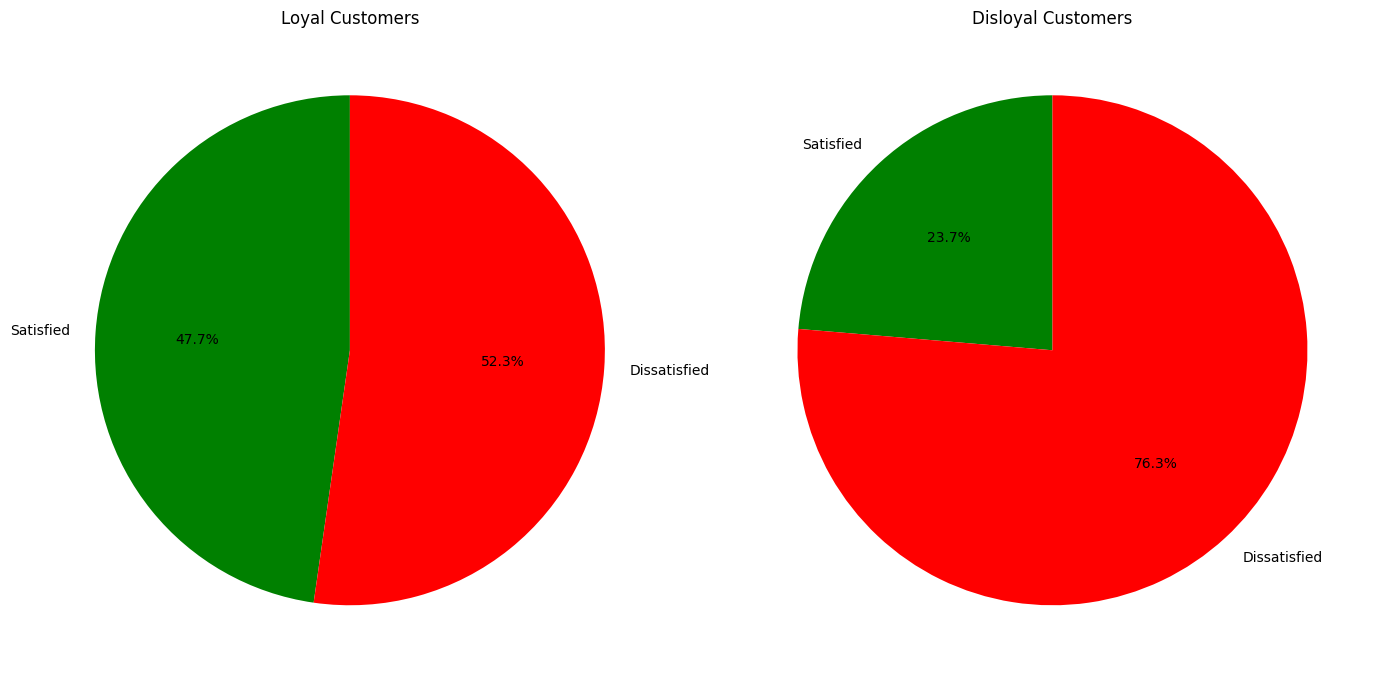

In [23]:
# Dati forniti per i clienti leali e non leali rispetto alla soddisfazione
customer_satisfaction = {
    'Loyal': {
        'Satisfied': 40533,
        'Dissatisfied': 44390
    },
    'Disloyal': {
        'Satisfied': 4492,
        'Dissatisfied': 14489
    }
}

# Calcolo la percentuale di clienti soddisfatti e insoddisfatti per entrambe le categorie (leali e non leali) usando un comprehension dictionary. 
# Per ogni tipo di cliente si divide il numero di clienti soddisfatti o insoddisfatti per il totale dei clienti in quella categoria e si moltiplica per 100 per ottenere
# la percentuale.
percentages = {customer_type: {satisfaction: count / sum(status.values()) * 100 
                               for satisfaction, count in status.items()} 
               for customer_type, status in customer_satisfaction.items()}

# Preparazione dei dati per il grafico a torta: Vengono creati due array, loyal_sizes e disloyal_sizes 
# contenenti le percentuali di soddisfazione e insoddisfazione per i clienti leali e non leali.

labels = ['Satisfied', 'Dissatisfied']
loyal_sizes = [percentages['Loyal']['Satisfied'], percentages['Loyal']['Dissatisfied']]
disloyal_sizes = [percentages['Disloyal']['Satisfied'], percentages['Disloyal']['Dissatisfied']]

# Creazione di grafici a torta che mostrano le percentuali di soddisfazione e insoddisfazione
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Grafico per i clienti leali
axs[0].pie(loyal_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axs[0].set_title('Loyal Customers')

# Grafico per i clienti non leali
axs[1].pie(disloyal_sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
axs[1].set_title('Disloyal Customers')

# Mostra il grafico
plt.tight_layout()
plt.show()



 - Il grafico dei clienti fedeli indica che il livello di soddisfazione è quasi equamente diviso, sebbene non perfettamente bilanciato.
 - Il grafico dei clienti non fedeli  suggerisce che i clienti non fedeli sono prevalentemente insoddisfatti del servizio o del prodotto.

 L'azienda in questione potrebbe voler indagare sulle cause di insoddisfazione, specialmente tra la sua base di clienti fedeli, dato che i loro livelli di soddisfazione sono cruciali per mantenere i clienti.
  
 Fattori di Fedeltà: Servizio a bordo e intrattenimento in volo sembrano essere fattori cruciali che influenzano positivamente la fedeltà dei clienti. 

 Potenziali Aree di Miglioramento: Per i clienti non fedeli, questi aspetti potrebbero essere aree da indagare e  migliorare per aumentare la loro soddisfazione e potenzialmente convertirli in clienti fedeli.

2.4  SODDISFAZIONE

In [24]:
# Stampo la variabile 'satisfaction'
print("Distribuzione della variabile 'satisfaction':")
print(train_data['satisfaction'].value_counts())

Distribuzione della variabile 'satisfaction':
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


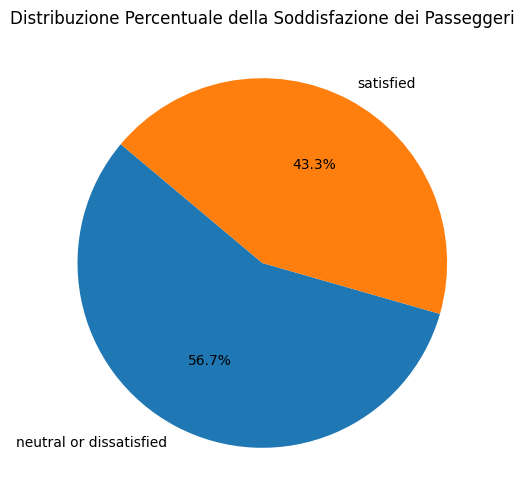

In [25]:
# Calcolo della distribuzione percentuale per la variabile 'satisfaction'
satisfaction_counts = train_data['satisfaction'].value_counts(normalize=True) * 100

# Creazione di un diagramma a torta
plt.figure(figsize=(8, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione Percentuale della Soddisfazione dei Passeggeri')
plt.show()

La variabile target satisfaction mostra che c'è una leggera prevalenza di passeggeri neutri o insoddisfatti rispetto a quelli soddisfatti

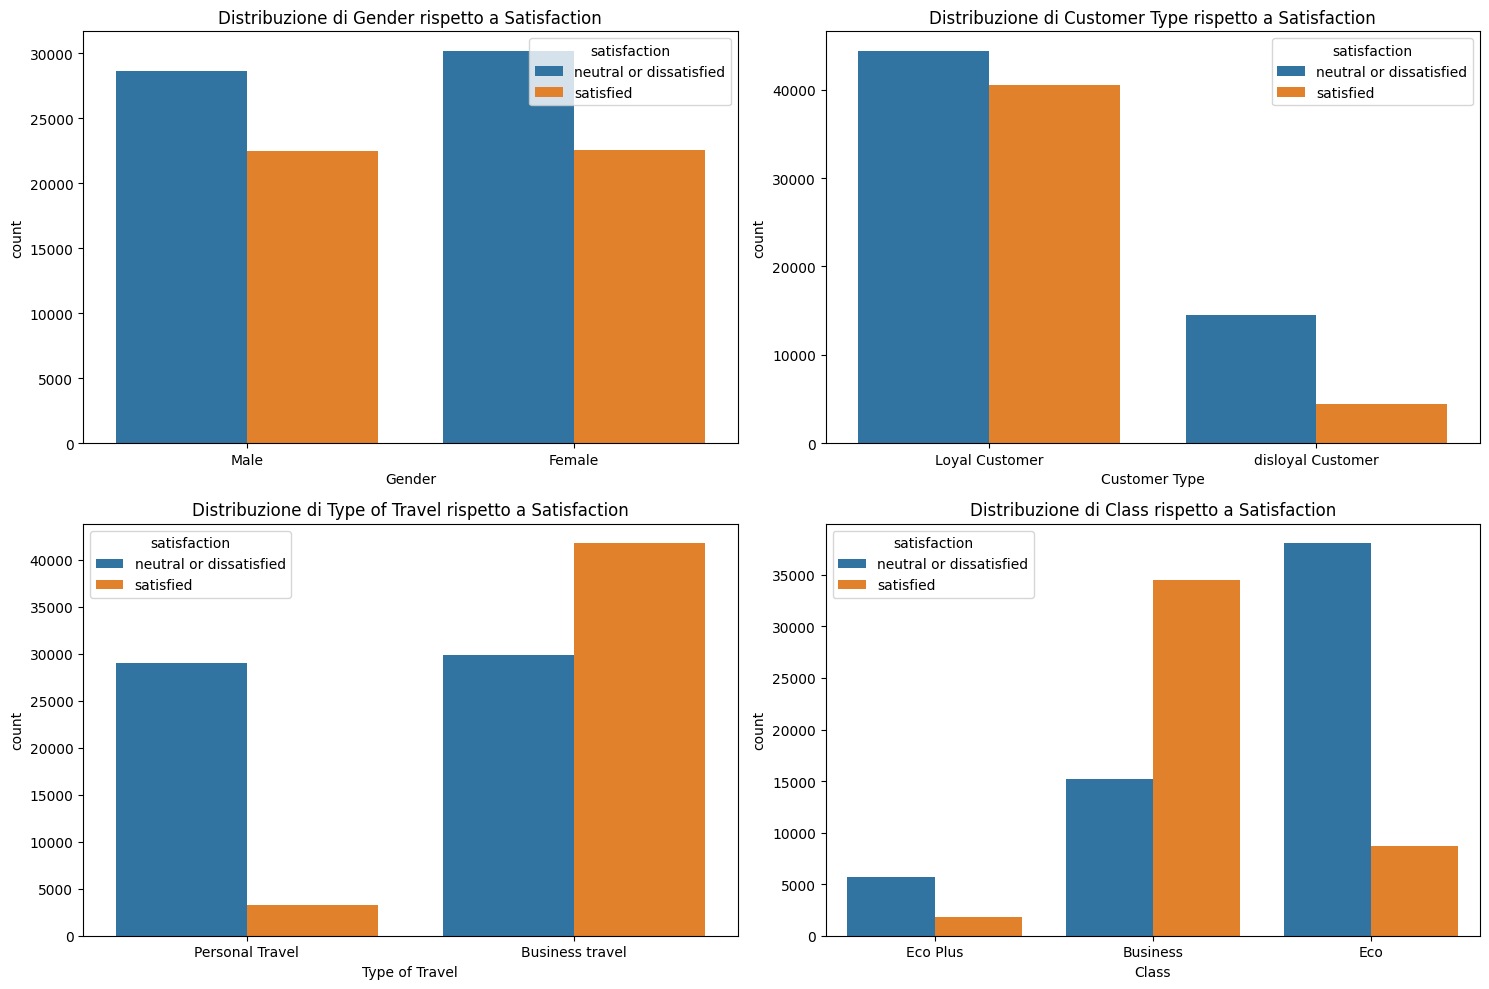

In [26]:
# Elenco delle variabili categoriche, esclusa la variabile target 'satisfaction'
categorical_vars = data.select_dtypes(include=['object']).columns
categorical_vars = categorical_vars[categorical_vars != 'satisfaction']

# Configurazione dei grafici
n_vars = len(categorical_vars)
n_rows = (n_vars + 1) // 2  # Calcola il numero di righe necessarie per 2 grafici per riga
plt.figure(figsize=(15, 5 * n_rows))

 # genero una serie di grafici a barre, ognuno dei quali rappresenta la distribuzione di una variabile categorica rispetto alla soddisfazione del cliente
for i, var in enumerate(categorical_vars):
    plt.subplot(n_rows, 2, i + 1)
    sns.countplot(x=var, hue='satisfaction', data=data)
    plt.title(f'Distribuzione di {var} rispetto a Satisfaction')
    plt.tight_layout()

plt.show()




Da un analisi preliminare possiamo dire che :

- Le variabili categoriche come il tipo di cliente, il tipo di viaggio e la classe di volo sembrano avere un impatto maggiore sulla soddisfazione dei passeggeri rispetto al genere.

- La fedeltà correlata ai viaggi di lavoro ci può far intuire che la strategia di fedelizzazione funziona molto bene


Controllo eventuali correlazioni tra le variabile numeriche e la soddisfazione

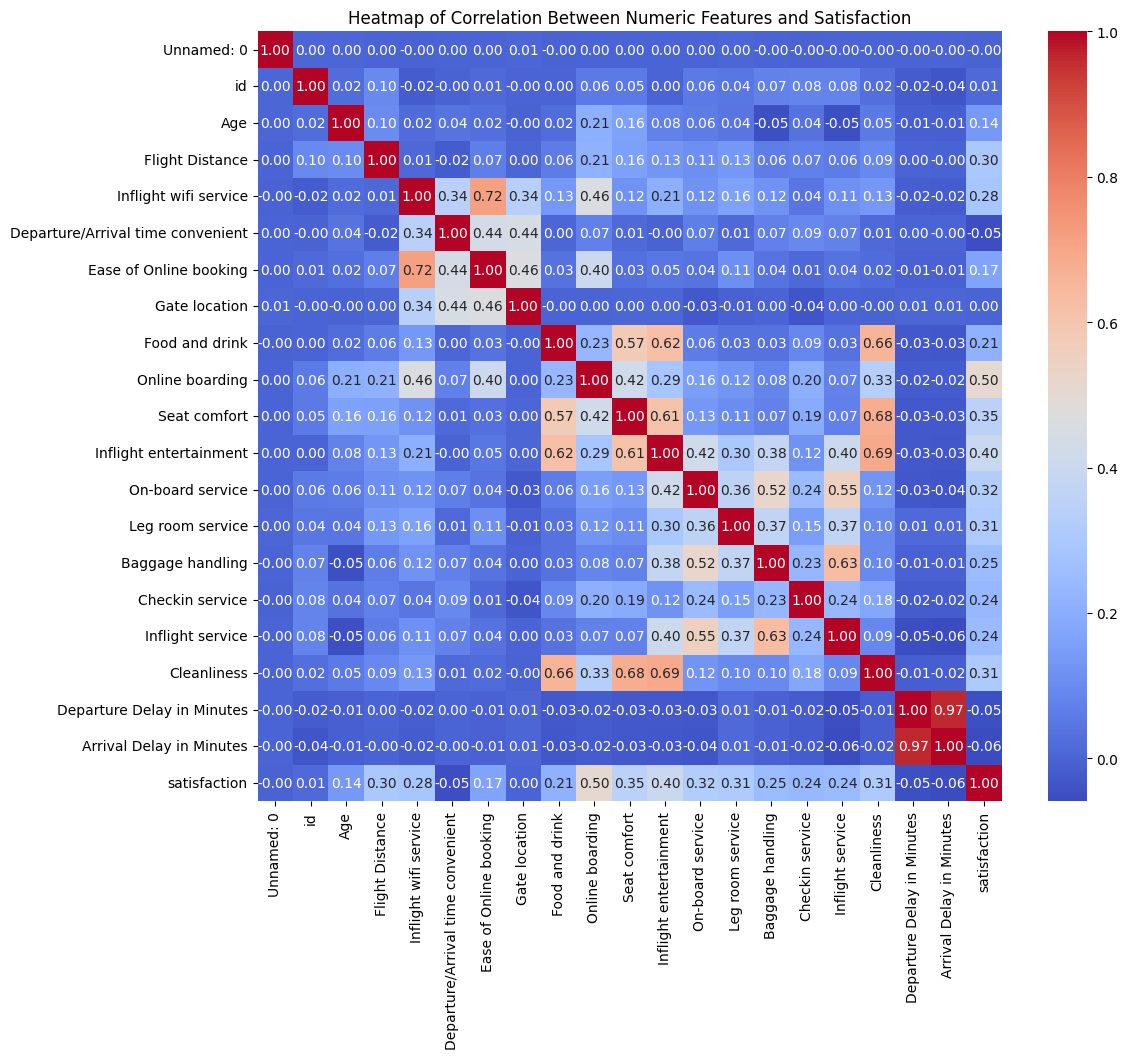

In [27]:
# Seleziono solo le colonne numeriche, inclusa la colonna 'satisfaction' codificata
numeric_data = data.select_dtypes(include=[np.number])

# Mi assicuro che la colonna 'satisfaction' sia presente
if 'satisfaction' not in numeric_data.columns:
    # Codifichiamo la colonna 'satisfaction' se non è già stata codificata
    data['satisfaction'] = data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
    numeric_data = data.select_dtypes(include=[np.number])

# Calcolo la matrice di correlazione solo per le variabili numeriche
correlation_matrix = numeric_data.corr()

# Creazione della heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Between Numeric Features and Satisfaction')
plt.show()




CONCLUSIONI PRELIMINARI

Le variabili più influenti nella soddisfazione del cliente sembrano essere:

Online Boarding: Ha una correlazione molto alta con 'satisfaction', suggerendo che l'esperienza di boarding online è un fattore determinante per la soddisfazione complessiva dei clienti.

Inflight Wifi Service: Anche questa variabile mostra una correlazione significativa con la soddisfazione, indicando che la qualità del wifi a bordo è importante per i clienti.

Seat Comfort: Il comfort dei sedili è fortemente correlato con la soddisfazione, il che è intuitivo poiché i sedili confortevoli sono spesso una priorità per i passeggeri.

Inflight Entertainment: Ha una correlazione positiva con la soddisfazione, indicando che l'intrattenimento durante il volo contribuisce significativamente all'esperienza complessiva del passeggero.

Cleanliness: La pulizia ha una forte correlazione con la soddisfazione, il che riflette l'importanza di un ambiente pulito per i clienti.

Leg Room Service: Lo spazio per le gambe è anche correlato con la soddisfazione, suggerendo che più spazio per le gambe può aumentare la soddisfazione del cliente.

Baggage Handling: La gestione dei bagagli mostra una correlazione positiva con la soddisfazione, indicando che una manipolazione efficace e attenta dei bagagli è apprezzata dai passeggeri.

3. FEATURE ENGINEERING

- Dataset di Train

In [28]:
# Creo la variabile 'Total_Delay' in modo da avere un visione unica dei ritardi complessivi e facilitare l'analisi del modelli
train_data['Total_Delay'] = train_data['Departure Delay in Minutes'] + train_data['Arrival Delay in Minutes']

# Trasformo la variabile categorica testuale 'satisfaction' in una variabile categorica numerica, facilitandone l'uso per i modelli
# Mappatura della colonna 'satisfaction'.
if 'satisfaction' in train_data.columns:
    train_data['satisfaction'] = train_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})


In [29]:
# Selezione delle variabili numeriche escludendo 'Departure Delay in Minutes' e 'Arrival Delay in Minutes'
numeric_vars = train_data.select_dtypes(include=[np.number]).columns
numeric_vars = numeric_vars.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

# Inizializzazione e addestramento dello StandardScaler con le variabili selezionate
scaler = StandardScaler()
scaler.fit(train_data[numeric_vars])


StandardScaler()

In [30]:
# Addestramento di OneHotEncoder sulle colonne categoriche selezionate
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoder.fit(train_data[['Type of Travel', 'Class', 'Customer Type']])


OneHotEncoder(handle_unknown='ignore')

- Dataset di test

In [31]:
# Imputazione dei valori mancanti con 0  e calcolo della colonna 'Total_Delay'
test_data['Arrival Delay in Minutes'].fillna(0, inplace=True)
test_data['Total_Delay'] = test_data['Departure Delay in Minutes'] + test_data['Arrival Delay in Minutes']

# Mappatura della colonna 'satisfaction' (conversione dei valori testuali in numerici)
if 'satisfaction' in test_data.columns:
    test_data['satisfaction'] = test_data['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# considero le variabili categoriche addestrate precedentemente
categorical_vars = ['Type of Travel', 'Class', 'Customer Type'] 

# Trasformazione delle variabili categoriche usando il one_hot_encoder  per adattarle ai modelli 
test_data_encoded = one_hot_encoder.transform(test_data[categorical_vars])

# Estrazione dei nomi delle colonne numeriche del test set, escludendo 'Departure Delay in Minutes' e 'Arrival Delay in Minutes'
numeric_vars_test = test_data.select_dtypes(include=[np.number]).columns
numeric_vars_test = numeric_vars_test.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

# Standardizzazione delle variabili numeriche usando lo scaler addestrato sul set di train
test_data[numeric_vars_test] = scaler.transform(test_data[numeric_vars_test])

4. MODELLIZZAZIONE

In [32]:
# Mi assicuro che le colonne necessarie per la modellizzazione siano presenti  
if 'Departure Delay in Minutes' in train_data.columns and 'Arrival Delay in Minutes' in train_data.columns:
    
    train_data['Total_Delay'] = train_data['Departure Delay in Minutes'] + train_data['Arrival Delay in Minutes']
else:
    print("Le colonne necessarie per calcolare Total_Delay non esistono.")


In [33]:
# Seleziona le variabili numeriche e categoriche specificate
numeric_features = train_data[['Food and drink', 'Seat comfort', 'Inflight entertainment', 
                               'On-board service', 'Leg room service', 'Inflight service', 
                               'Cleanliness', 'Total_Delay']]
categorical_features = train_data[['Customer Type', 'Type of Travel', 'Class']]

# Codifica one-hot delle variabili categoriche
one_hot_encoder = OneHotEncoder()
categorical_encoded = one_hot_encoder.fit_transform(categorical_features).toarray()

# Unione delle variabili numeriche e categoriche codificate nel dataframe feature
features = pd.concat([numeric_features, pd.DataFrame(categorical_encoded)], axis=1)

# Estrazione della variabile target per la previsione 
target = train_data['satisfaction']

# Suddivisione in set di training e di test del 20% 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [34]:
# Mappatura delle etichette
label_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

4.1 RANDOMFOREST

In [35]:
# Preparazione delle variabili scelte e della variabile target
features = train_data[['Food and drink', 'Seat comfort', 'Inflight entertainment', 
                       'On-board service', 'Leg room service', 'Inflight service', 
                       'Cleanliness', 'Total_Delay']]
target = train_data['satisfaction']

# Suddivisione in set di training e di test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creazione di un imputatore che sostituisce i valori NaN con la mediana delle colonne
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Applico l'imputatore a X_train e X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Creazione del modello Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Addestramento del modello sul set di training imputato
random_forest_model.fit(X_train_imputed, y_train)

# Valutazione del modello sul set di test imputato
y_pred_rf = random_forest_model.predict(X_test_imputed)
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.7780183821760261

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.78      0.85      0.81     11713
           1       0.78      0.69      0.73      9068

    accuracy                           0.78     20781
   macro avg       0.78      0.77      0.77     20781
weighted avg       0.78      0.78      0.78     20781



- L'accuratezza di circa 77.80% è un buon punto di partenza, e le altre metriche nel report di classificazione forniscono una panoramica più dettagliata delle prestazioni del modello.

- La Precisione: Indica la percentuale di identificazioni positive che erano effettivamente corrette,ho una percentuale del 78% per entrambe le classi

- Recall (Sensibilità): Mostra la percentuale di casi positivi effettivi che sono stati identificati correttamente. Il modello sembra essere leggermente migliore nel rilevare i casi di "neutral or dissatisfied" rispetto a "satisfied", probabilmente perchè sono di più.

- F1-Score: È una media armonica di precisione e recall, è abbastanza buono per entrambi le classi.

- Support: Indica il numero di casi effettivi per ogni classe nel set di test.

4.2 XGBOOST

In [36]:
xgboost_model = xgb.XGBClassifier()

# Addestramento del modello XGBoost sul set di training imputato
xgboost_model.fit(X_train_imputed, y_train)

# Valutazione del modello XGBoost sul set di test imputato
y_pred_xgb = xgboost_model.predict(X_test_imputed)
print("Accuracy (XGBoost):", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))


Accuracy (XGBoost): 0.8061690967710889

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.79      0.89      0.84     11713
           1       0.83      0.69      0.76      9068

    accuracy                           0.81     20781
   macro avg       0.81      0.79      0.80     20781
weighted avg       0.81      0.81      0.80     20781



 Dai risultati ottenuti, sembra che il modello XGBoost abbia prestazioni leggermente migliori rispetto al Random Forest, con un'accuratezza del 80.61%

Precisione: La precisione per entrambe le classi è alta, con un valore leggermente superiore per la classe 1 (soddisfatti).

Recall: Il recall è più alto per la classe 0 (neutrali o insoddisfatti) rispetto alla classe 1, il che suggerisce che il modello è più efficiente nel rilevare i casi neutrali o insoddisfatti rispetto ai casi soddisfatti.

F1-Score: L'F1-Score, che è una media armonica di precisione e recall, è buono per entrambe le classi, con un punteggio leggermente più alto per la classe 0.


Rispetto al modello Random Forest che aveva un'accuratezza di circa 77.80%, XGBoost mostra un miglioramento significativo. Questo potrebbe essere dovuto all'efficacia di XGBoost nel gestire le caratteristiche del dataset e nella sua capacità di modellare interazioni complesse.

4.3 Iperparamentri

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Grid Search per Random Forest
rf_param_grid = {
    'n_estimators': [100, 150, 200],         #numero di alberi, questi numeri sono un buon copromesso tra tempo di addestramento e utilizzo in mmemoria
    'max_depth': [10, 15, 20],               #profondità massima, ho scelto questi valori per evitare overfitting
    'min_samples_split': [2, 4, 6],          #numero minimo di campioni per dividere un nodo
    'min_samples_leaf': [1, 2, 3]            #numero minimo di campioni per un nodo foglia
}
#Creo un oggetto Gridsearchcv che esegue una ricerca su tutte le combinazioni di parametri in rf_param_grid
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_imputed, y_train)                                         # avvio la grid search 
print("Migliori parametri (Random Forest):", rf_grid_search.best_params_)            # stampo i migliori parametri trovati

# Grid Search per XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],      #tasso di apprendimento
    'n_estimators': [100, 150, 200],         #numero di alberi da costruire
    'max_depth': [3, 5, 7],                  
    'subsample': [0.7, 0.8, 0.9]             #frazioni dei campioni per addestrare ciascun albero evita l'overfitting
}
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train_imputed, y_train)
print("Migliori parametri (XGBoost):", xgb_grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


Migliori parametri (Random Forest): {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Migliori parametri (XGBoost): {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


4.4 OTTIMIZZAZIONE

Random forest ottimizzato

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Creazione del modello Random Forest con gli iperparametri
optimized_rf_model = RandomForestClassifier(
    max_depth=15, 
    min_samples_leaf=3, 
    min_samples_split=2, 
    n_estimators=150, 
    random_state=42
)

# Addestramento del modello sul set di training imputato
optimized_rf_model.fit(X_train_imputed, y_train)

# Valutazione del modello sul set di test imputato
y_pred_opt_rf = optimized_rf_model.predict(X_test_imputed)
print("Accuracy (Random Forest Ottimizzato):", accuracy_score(y_test, y_pred_opt_rf))
print("\nClassification Report (Random Forest Ottimizzato):\n", classification_report(y_test, y_pred_opt_rf))


Accuracy (Random Forest Ottimizzato): 0.8071315143640826

Classification Report (Random Forest Ottimizzato):
               precision    recall  f1-score   support

           0       0.79      0.90      0.84     11713
           1       0.84      0.69      0.76      9068

    accuracy                           0.81     20781
   macro avg       0.82      0.79      0.80     20781
weighted avg       0.81      0.81      0.80     20781



- Accuratezza: C'è stato un miglioramento nell'accuratezza complessiva, passando dal 77.80% al 80.71%, indicando che il modello ottimizzato è più preciso nel fare    previsioni corrette.

- Precisione: La precisione per la classe "satisfied" è migliorata significativamente, indicando che il modello ottimizzato è ora più accurato nel prevedere i casi soddisfatti.

- Recall: Il recall per la classe "neutral or dissatisfied" è migliorato, ma c'è stata una leggera diminuzione per la classe "satisfied".

- F1-Score: L'F1-Score per entrambe le classi è migliorato

Insight:
L'ottimizzazione degli iperparametri ha reso il Random Forest più efficace e bilanciato nelle sue previsioni

VISUALIZZO LA CROSS-VALIDATION

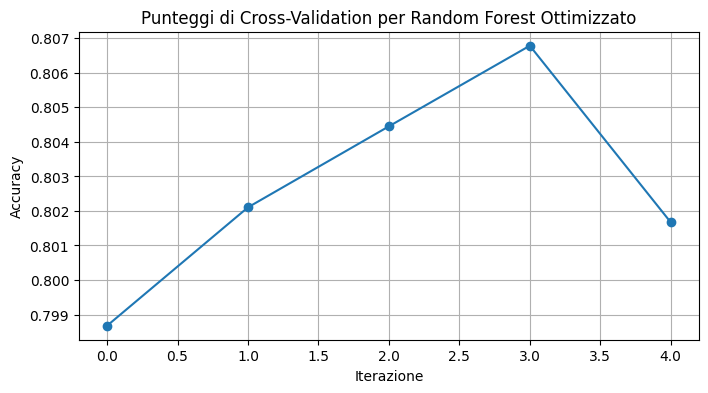

Punteggi di Cross-Validation: [0.79867669 0.80210526 0.80445113 0.80678537 0.80167228]
Media dei punteggi di Cross-Validation: 0.8027381468589665


In [38]:
from sklearn.model_selection import cross_val_score
# Calcolo dei punteggi di cross-validation
cv_scores = cross_val_score(optimized_rf_model, X_train_imputed, y_train, cv=5)

# Visualizzazione dei punteggi di cross-validation
plt.figure(figsize=(8, 4))
plt.plot(cv_scores, marker='o')
plt.title("Punteggi di Cross-Validation per Random Forest Ottimizzato")
plt.ylabel("Accuracy")
plt.xlabel("Iterazione")
plt.grid(True)
plt.show()

# Stampa dei punteggi
print("Punteggi di Cross-Validation:", cv_scores)
print("Media dei punteggi di Cross-Validation:", cv_scores.mean())

TROVO LE FEATURE PIU IMPORTANTI 

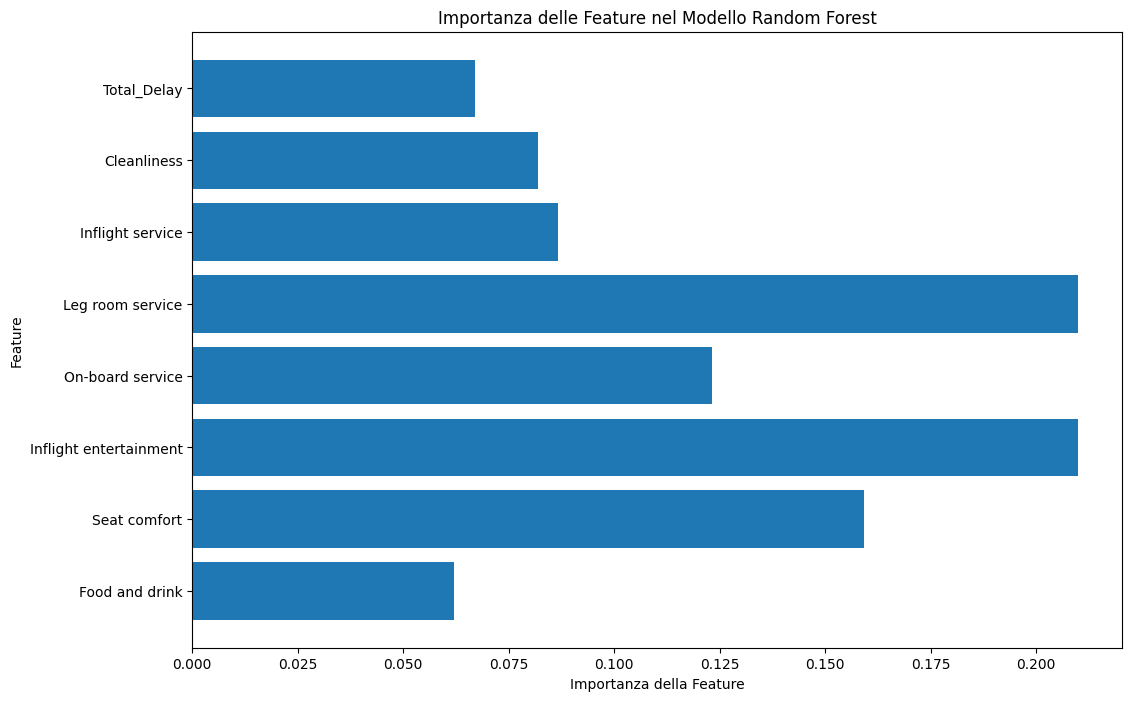

In [39]:
# Ottenimento dell'importanza delle feature dal modello Random Forest ottimizzato
feature_importances = optimized_rf_model.feature_importances_
features = X_train.columns

# Visualizzazione dell'importanza delle feature
plt.figure(figsize=(12, 8))
plt.barh(features, feature_importances)
plt.xlabel("Importanza della Feature")
plt.ylabel("Feature")
plt.title("Importanza delle Feature nel Modello Random Forest")
plt.show()


per il modello random forest le feature più importanti sono:
- leg room service 0.200 
- inflight entertainment 0.198
- Seat comfort 0.154
- On-board service 0.121

XGboost ottimizzato

In [40]:
import xgboost as xgb

# Creazione del modello XGBoost con i migliori parametri
optimized_xgb_model = xgb.XGBClassifier(
    learning_rate=0.05, 
    max_depth=7, 
    n_estimators=200, 
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,  # per evitare warning
    eval_metric='mlogloss'    # per evitare warning
)

# Addestramento del modello XGBoost sul set di training imputato
optimized_xgb_model.fit(X_train_imputed, y_train)

# Valutazione del modello XGBoost sul set di test imputato
y_pred_opt_xgb = optimized_xgb_model.predict(X_test_imputed)
print("Accuracy (XGBoost Ottimizzato):", accuracy_score(y_test, y_pred_opt_xgb))
print("\nClassification Report (XGBoost Ottimizzato):\n", classification_report(y_test, y_pred_opt_xgb))


Accuracy (XGBoost Ottimizzato): 0.8097300418651653

Classification Report (XGBoost Ottimizzato):
               precision    recall  f1-score   support

           0       0.80      0.89      0.84     11713
           1       0.83      0.70      0.76      9068

    accuracy                           0.81     20781
   macro avg       0.81      0.80      0.80     20781
weighted avg       0.81      0.81      0.81     20781



- Accuratezza: C'è un leggero miglioramento nell'accuratezza del modello XGBoost ottimizzato (circa 80.97%) rispetto al modello non ottimizzato (circa 80.62%).
- Precision: La precision per entrambe le classi è rimasta relativamente stabile, con un leggero miglioramento per la classe 1 nel modello ottimizzato
- Recall: Il recall per la classe 0 è rimasto stabile, mentre c'è stato un leggero miglioramento per la classe 1 nel modello ottimizzato
- F1-Score: Gli F1-score sono migliorati leggermente per la classe 1 nel modello ottimizzato

Insight:
l'ottimizzazione degli iperparametri ha portato a un leggero miglioramento nelle prestazioni di XGBoost, con un equilibrio leggermente migliore nelle metriche di valutazione.


VISUALIZZO LA CROSS-VALIDATION

In [41]:
# Calcolo dei punteggi di cross-validation
cv_scores_xgb = cross_val_score(optimized_xgb_model, X_train_imputed, y_train, cv=5)

# Calcolo della media e della deviazione standard dei punteggi
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print("Punteggi di Cross-Validation: ", cv_scores)
print("Media dei punteggi di Cross-Validation: ", mean_cv_score)
print("Deviazione standard dei punteggi di Cross-Validation: ", std_cv_score)

Punteggi di Cross-Validation:  [0.79867669 0.80210526 0.80445113 0.80678537 0.80167228]
Media dei punteggi di Cross-Validation:  0.8027381468589665
Deviazione standard dei punteggi di Cross-Validation:  0.002732996628598783


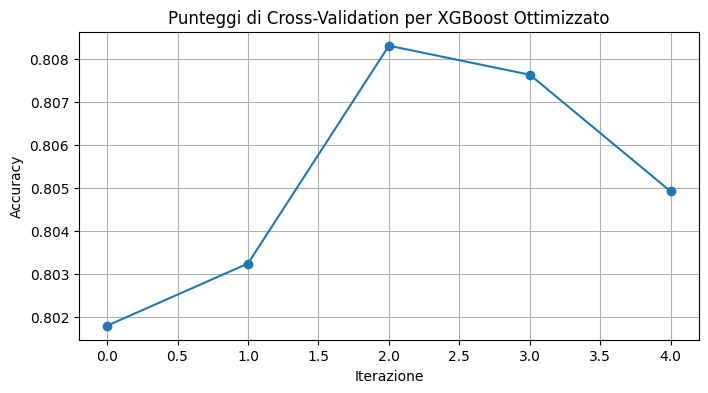

In [42]:
import matplotlib.pyplot as plt

# Assicurati che cv_scores_xgb contenga i punteggi di cross-validation del tuo modello XGBoost ottimizzato
# cv_scores_xgb = cross_val_score(optimized_xgb_model, X_train_imputed, y_train, cv=5)

plt.figure(figsize=(8, 4))
plt.plot(cv_scores_xgb, marker='o')
plt.title("Punteggi di Cross-Validation per XGBoost Ottimizzato")
plt.ylabel("Accuracy")
plt.xlabel("Iterazione")
plt.grid(True)
plt.show()


TROVO LE FEATURE PIU IMPORTANTI

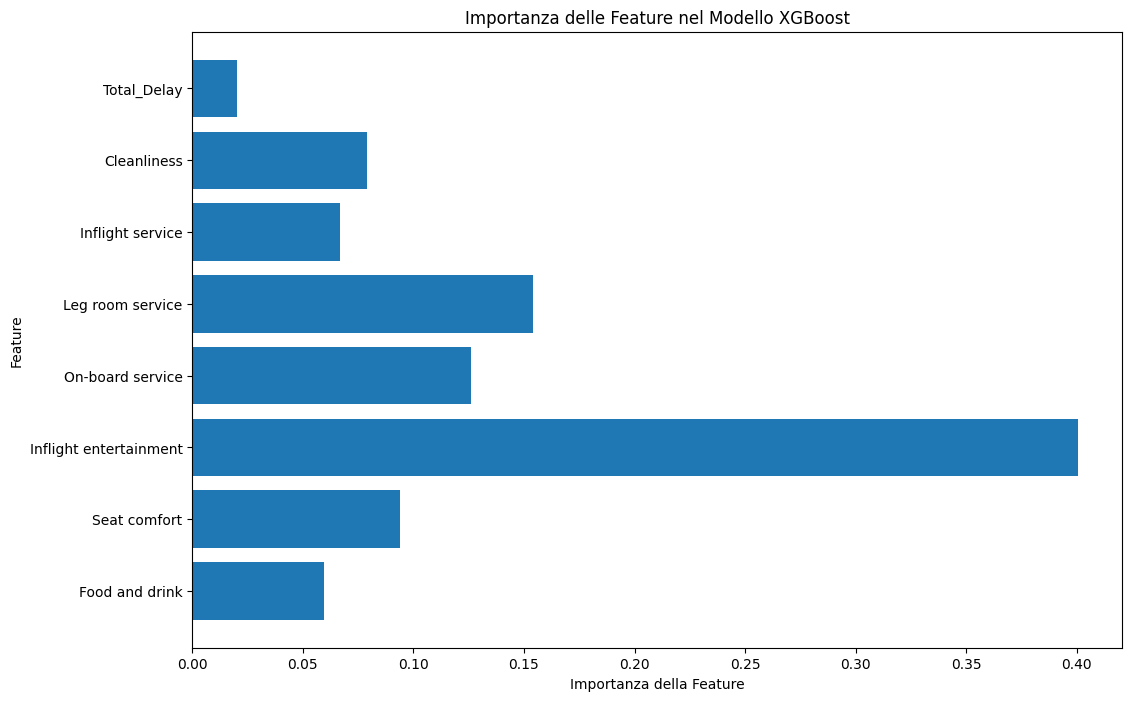

In [43]:
# Ottenimento dell'importanza delle feature dal modello XGBoost ottimizzato
feature_importances_xgb = optimized_xgb_model.feature_importances_
features_xgb = X_train.columns

# Visualizzazione dell'importanza delle feature
plt.figure(figsize=(12, 8))
plt.barh(features_xgb, feature_importances_xgb)
plt.xlabel("Importanza della Feature")
plt.ylabel("Feature")
plt.title("Importanza delle Feature nel Modello XGBoost")
plt.show()


per il modello XGboost le feature piu rilevanti sono: 
- inflight entertainment a 0.35 
- leg room service a 0.17 
- on board service 0.13 
- seat confort a 0.09

INSIGHT

Fattori Comuni: Entrambi i modelli identificano Inflight Entertainment, Leg Room Service e Seat Comfort come alcuni dei principali fattori che influenzano la soddisfazione del cliente. Questo evidenzia l'importanza di questi aspetti nell'esperienza del volo.

Differenze tra i Modelli: Mentre entrambi i modelli condividono alcune feature chiave, l'importanza relativa di queste feature varia, ad esempio l'Inflight Entertainment è particolarmente enfatizzato in XGBoost.

Focus sulle Migliorie: Queste intuizioni possono guidare decisioni strategiche su quali aspetti del servizio migliorare per aumentare la soddisfazione del cliente. Ad esempio, investire in migliori sistemi di intrattenimento a bordo e garantire un servizio eccellente possono avere un impatto significativo sulla soddisfazione del cliente.

Cross-validation: entrambi i modelli presentano prestazioni simili con un accuratezza media intorno all'80% con un leggero vantaggio da parte di xgboost, le prestazioni sono entrambe consistenti e sembra esserci una buona stabilità tra i modelli. Le prestazioni stabili suggeriscono che entrambi i modelli sono abbastanza equilibrati in termini di overfitting e underfitting.

5. CONCLUSIONI E RACCOMANDAZIONI

Il mio progetto Aerial Satisfy sulla soddisfazione dei passeggeri nel settore aereo ha portato a scoperte significative che possono guidare la compagnia nel migliorare i servizi offerti e aumentare la soddisfazione dei clienti. Attraverso un approcciodi machine learning, utilizzando modelli come Random Forest e XGBoost, siamo stati in grado di identificare i fattori chiave che influenzano maggiormente l'esperienza di volo dei passeggeri.

Tra questi fattori, l'Intrattenimento a Bordo e il Comfort del Posto si sono distinti come elementi critici. I risultati indicano che migliorare la qualità e la varietà dell'intrattenimento a bordo, oltre a investire in posti più confortevoli, può avere un impatto significativo sulla percezione complessiva del servizio aereo.
Allo stesso modo, la qualità del Servizio a Bordo e lo Spazio per le Gambe sono emersi come fattori importanti. Un servizio attento e personalizzato, insieme a un maggiore spazio per le gambe, può migliorare notevolmente l'esperienza complessiva dei passeggeri, contribuendo a una maggiore soddisfazione.

In base a quanto scoperto raccomando: 
- Investire in Sistemi di Intrattenimento a Bordo di Alta Qualità.
- Migliorare le caratteristiche ergonomiche dei Sedili e dove possibile aumentare lo spazio per le gambe.
- Potenziare il Servizio a Bordo: puntare sulla formazione del personale per garantire un'esperienza di servizio attenta alle esigenze dei passeggeri.
- Implementare Sistemi di Feedback Continuo: avere continue valutazioni sulla soddisfazione durante il volo è sempre di aiuto a capire cosa migliorare.
- Condurre Valutazioni Periodiche dei Servizi: una revisione sistematica dei servizi è fondamentale per mantenere standart di qualità



Alessandro Riccardi